**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
Total Data Size :  (178, 13) (178,)
Train/Test Sizes :  (151, 13) (27, 13) (151,) (27,)

Test  Accuracy :  0.9629629629629629
Train Accuracy :  0.9735099337748344
Expected/Base Values :  [ 0.68748179 -0.11301363 -0.57446815]

Shap Values for Sample 0 :  [array([ 2.69082376e-02, -1.78091272e-01,  2.71090108e-02, -8.90711590e-01,
        5.01040887e-01,  5.48477677e-02,  9.31182766e-02, -1.26585260e-03,
       -5.01405607e-02, -6.30519889e-02, -6.36886499e-05,  1.82024044e-01,
       -3.06961255e+00]), array([-3.430330

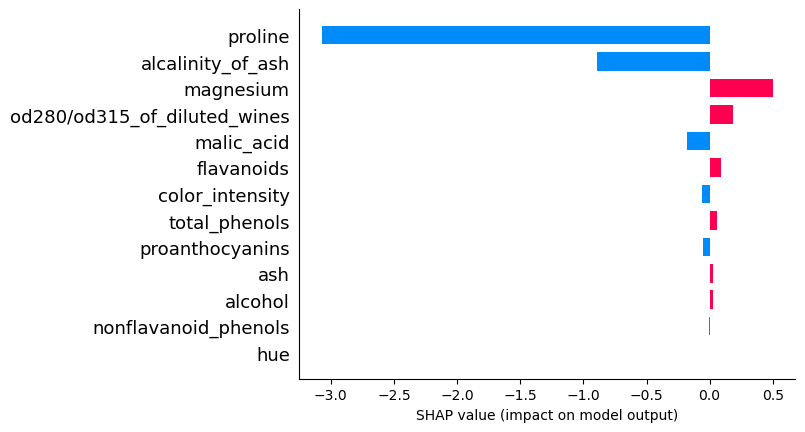

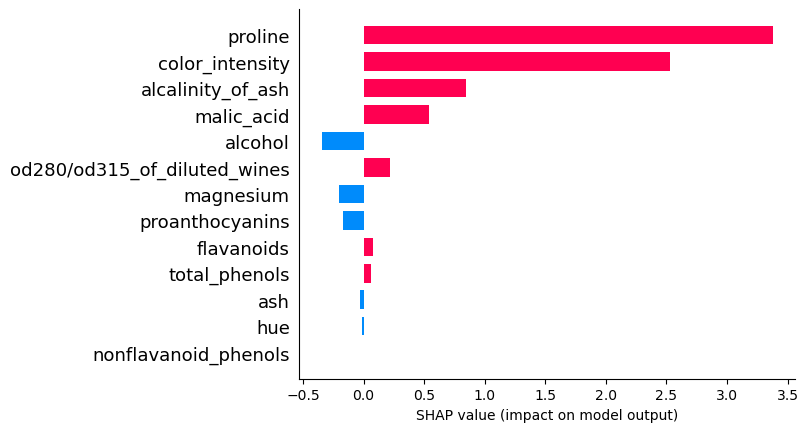

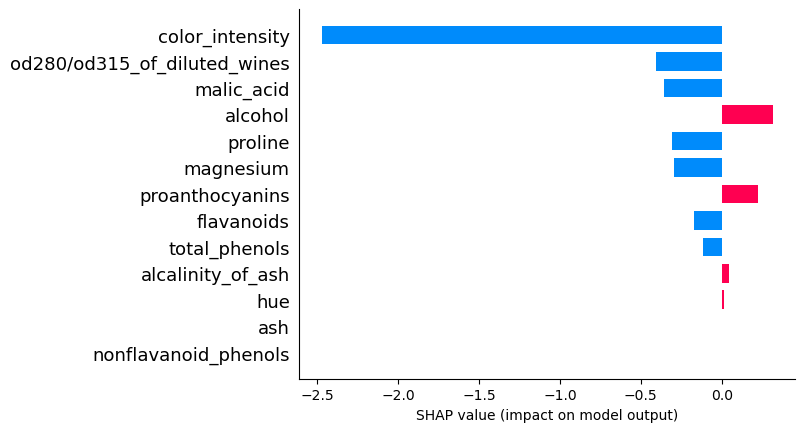

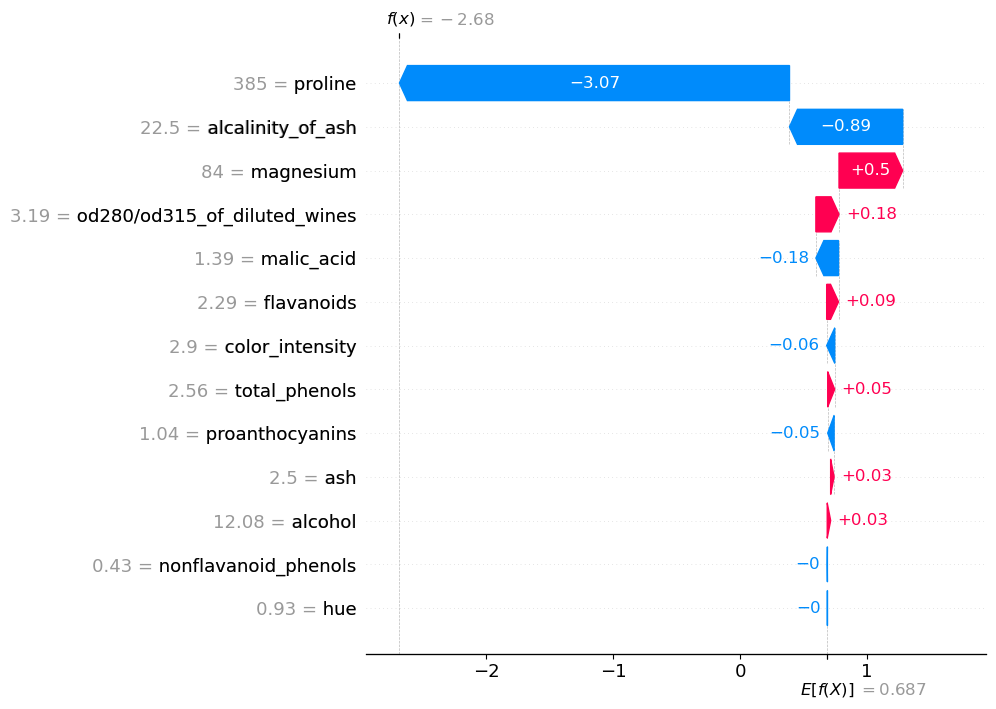

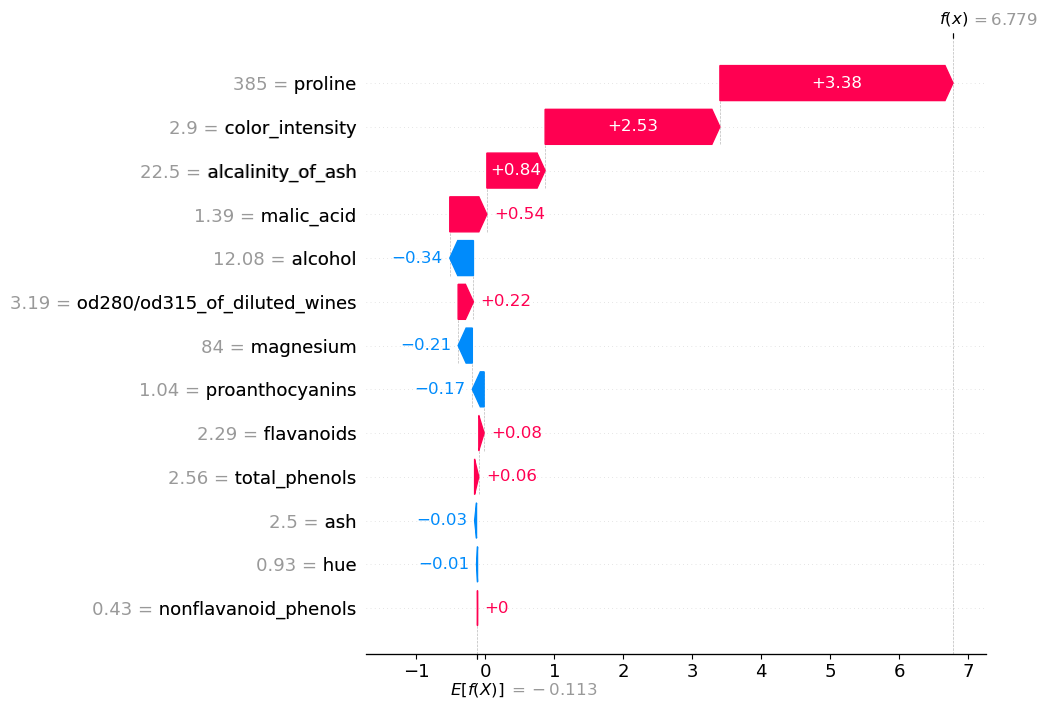

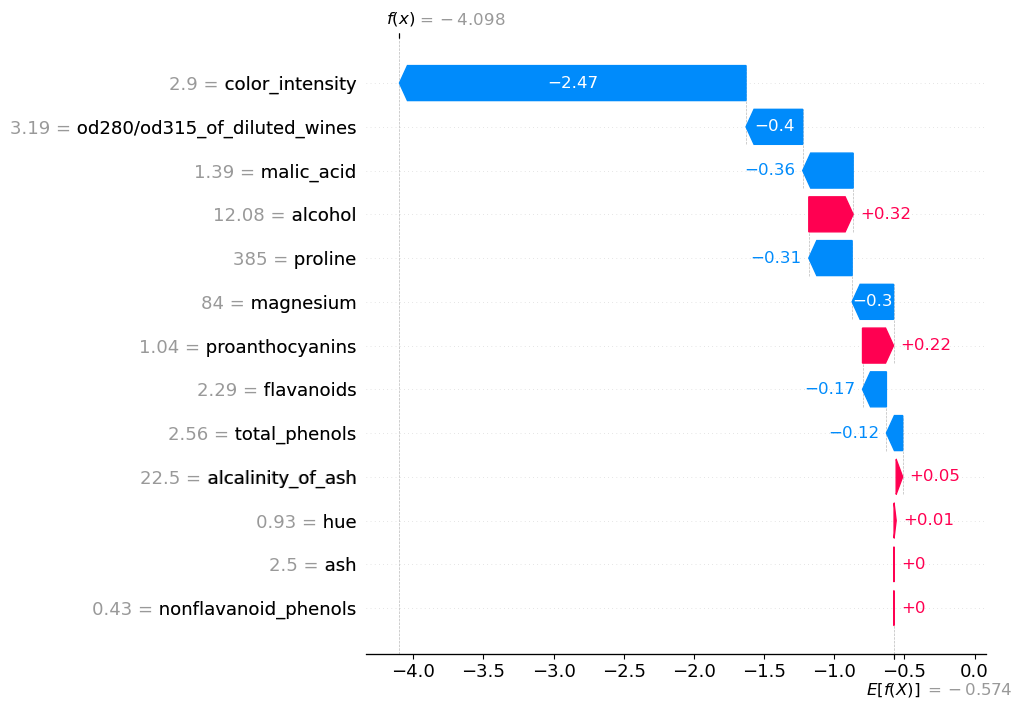

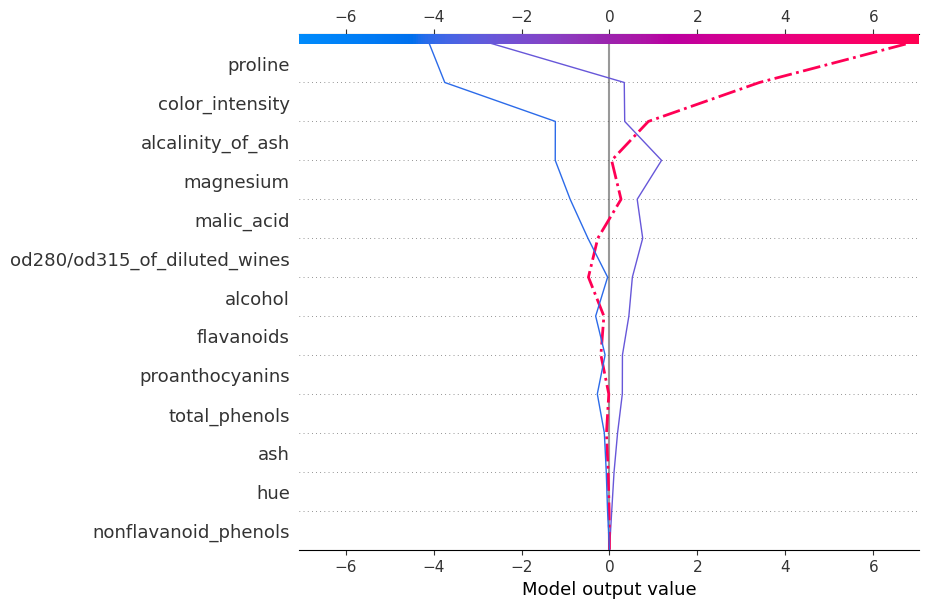

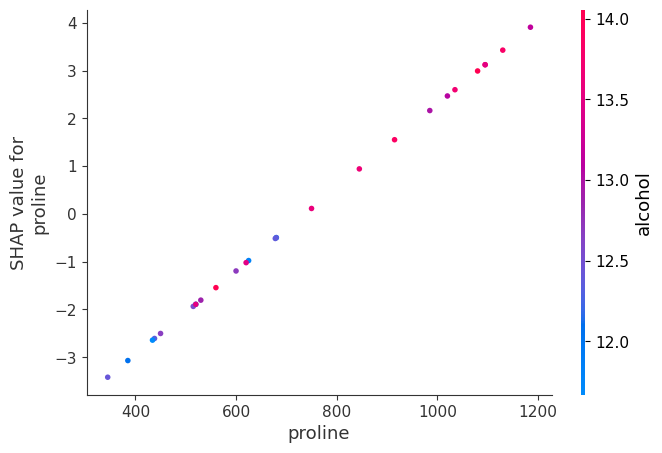

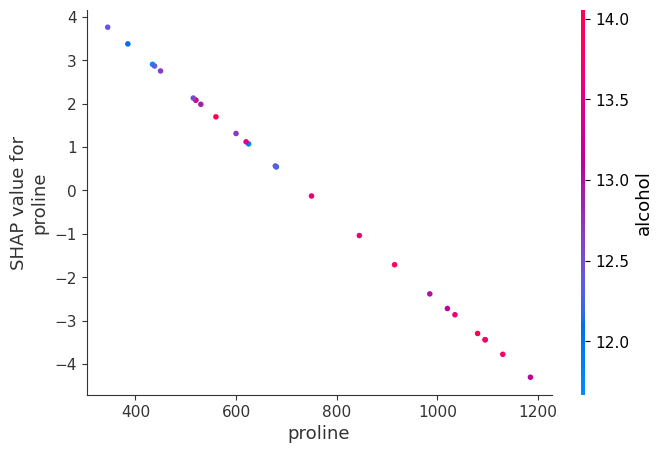

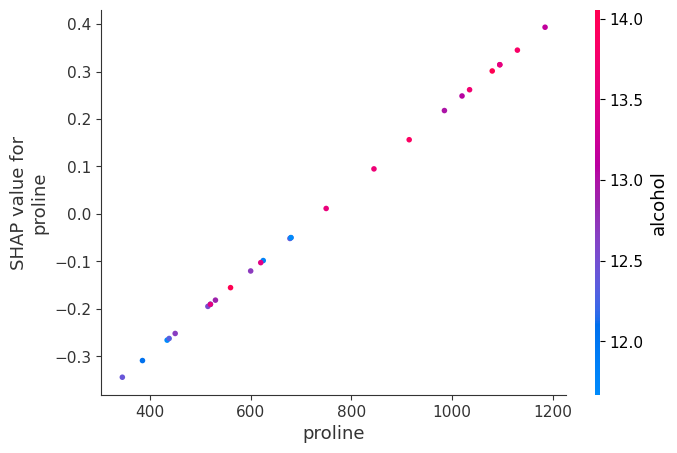

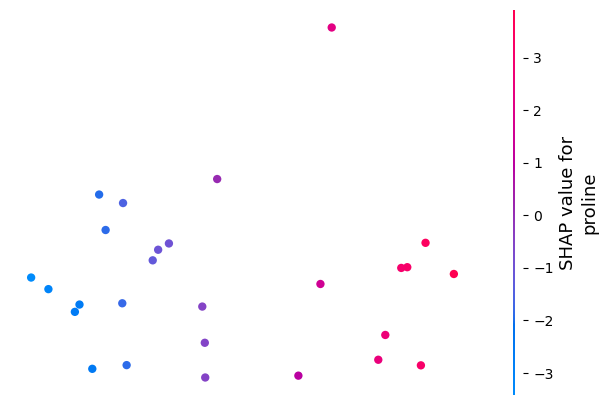

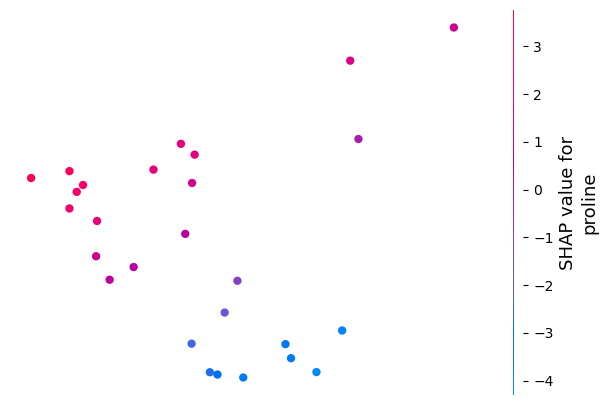

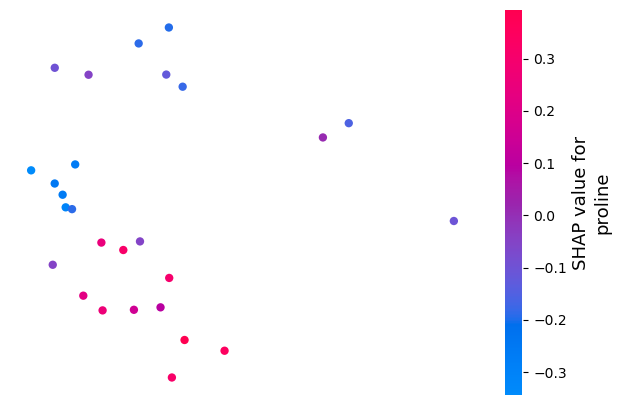

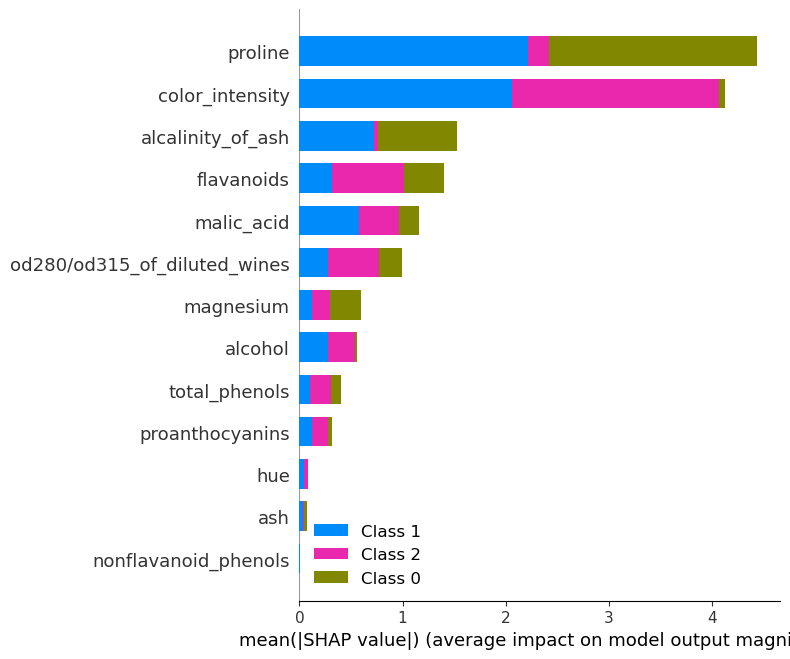

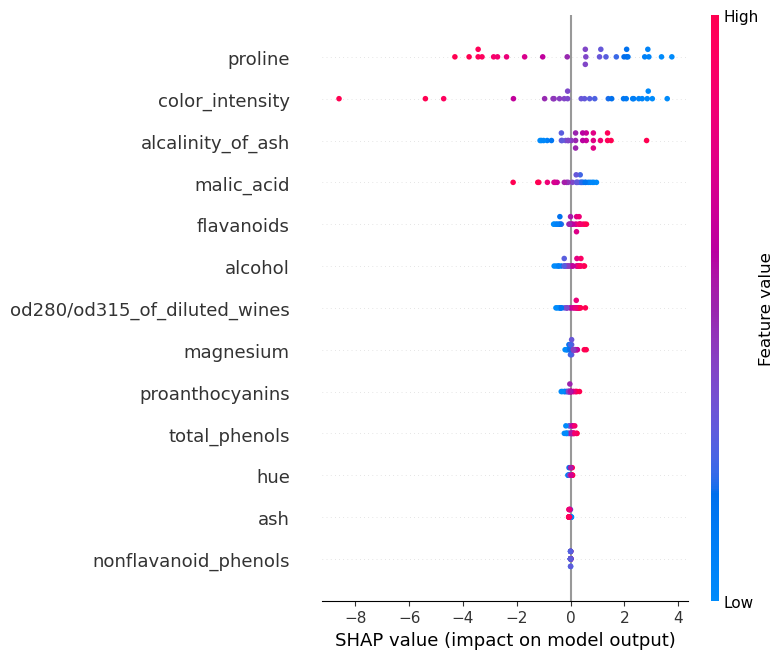

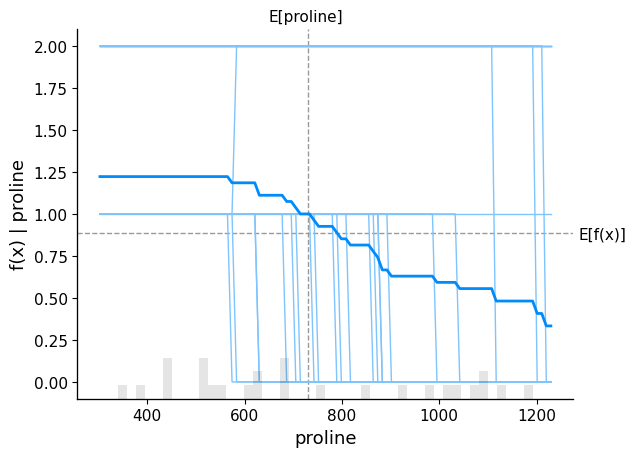

In [7]:
# Importation des bibliothèques
from flask import Flask, jsonify
import shap
import sklearn
from sklearn.datasets import load_wine
# import dash
# import dash_core_components as dcc
# import dash_html_components as html
# from dash.dependencies import Input, Output
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import load_wine

shap.initjs()

wine = load_wine()

for line in wine.DESCR.split("\n")[5:28]:
    print(line)

boston_df = pd.DataFrame(data=wine.data, columns = wine.feature_names)
boston_df["WineType"] = wine.target

boston_df.head()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X, Y = wine.data, wine.target

print("Total Data Size : ", X.shape, Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.85, test_size=0.15, stratify=Y, random_state=123, shuffle=True)

print("Train/Test Sizes : ",X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)

print()
print("Test  Accuracy : ", log_reg.score(X_test, Y_test))
print("Train Accuracy : ", log_reg.score(X_train, Y_train))

log_reg_explainer = shap.LinearExplainer(log_reg, X_train)

# 3.3 Explain Predictions using SHAP Values
# 3.3.1 Create Explainer Object (LinearExplainer)

sample_idx = 0

shap_vals = log_reg_explainer.shap_values(X_test[sample_idx])

val1 = log_reg_explainer.expected_value[0] + shap_vals[0].sum()
val2 = log_reg_explainer.expected_value[1] + shap_vals[1].sum()
val3 = log_reg_explainer.expected_value[2] + shap_vals[2].sum()

print("Expected/Base Values : ", log_reg_explainer.expected_value)
print()
print("Shap Values for Sample %d : "%sample_idx, shap_vals)
print("\n")
print("Prediction From Model                            : ", \
                      wine.target_names[log_reg.predict(X_test[sample_idx].reshape(1, -1))[0]])
print("Prediction From Adding SHAP Values to Base Value : ", wine.target_names[np.argmax([val1, val2, val3])])


# 3.3.2 Bar Plot

shap.bar_plot(log_reg_explainer.shap_values(X_test[0])[0], feature_names=wine.feature_names, max_display=len(wine.feature_names))
shap.bar_plot(log_reg_explainer.shap_values(X_test[0])[1], feature_names=wine.feature_names, max_display=len(wine.feature_names))
shap.bar_plot(log_reg_explainer.shap_values(X_test[0])[2], feature_names=wine.feature_names, max_display=len(wine.feature_names))

# 3.3.3 Waterfall Plot

shap_values = log_reg_explainer(X_test[:1])
shap_values.feature_names = wine.feature_names

shap_values

shap.waterfall_plot(shap_values[0][:, 0], max_display=len(wine.feature_names))

shap.waterfall_plot(shap_values[0][:, 1], max_display=len(wine.feature_names))

shap.waterfall_plot(shap_values[0][:, 2], max_display=len(wine.feature_names))

# 3.3.4 Decision Plot

shap.multioutput_decision_plot(log_reg_explainer.expected_value.tolist(),
                               log_reg_explainer.shap_values(X_test),
                               row_index=0,
                               feature_names=wine.feature_names,
                               highlight = [1]
                               )

# 3.3.5 Dependence Plot

shap.dependence_plot("proline",
                     log_reg_explainer.shap_values(X_test)[0],
                     features=X_test,
                     feature_names=wine.feature_names,
                     )

shap.dependence_plot("proline",
                     log_reg_explainer.shap_values(X_test)[1],
                     features=X_test,
                     feature_names=wine.feature_names,
                     )

shap.dependence_plot("proline",
                     log_reg_explainer.shap_values(X_test)[2],
                     features=X_test,
                     feature_names=wine.feature_names,
                     )

# 3.3.6 Embedding Plot

shap.embedding_plot("proline", log_reg_explainer.shap_values(X_test)[0], feature_names=wine.feature_names),
shap.embedding_plot("proline", log_reg_explainer.shap_values(X_test)[1], feature_names=wine.feature_names),
shap.embedding_plot("proline", log_reg_explainer.shap_values(X_test)[2], feature_names=wine.feature_names)

# 3.3.7 Force Plot

shap.force_plot(log_reg_explainer.expected_value[0],
                log_reg_explainer.shap_values(X_test[0])[0],
                feature_names=wine.feature_names,
                out_names="Wine Type")

shap.force_plot(log_reg_explainer.expected_value[1],
                log_reg_explainer.shap_values(X_test[0])[1],
                feature_names=wine.feature_names,
                out_names="Wine Type")


shap.force_plot(log_reg_explainer.expected_value[2],
                log_reg_explainer.shap_values(X_test[0])[2],
                feature_names=wine.feature_names,
                out_names="Wine Type")

shap.force_plot(log_reg_explainer.expected_value[0],
                log_reg_explainer.shap_values(X_test[:10])[0],
                feature_names=wine.feature_names,
                out_names="Wine Type", figsize=(25,3),
                link="identity")

# 3.3.8 Summary Plot

shap.summary_plot(log_reg_explainer.shap_values(X_test),
                  feature_names=wine.feature_names)

shap.summary_plot(log_reg_explainer.shap_values(X_test)[1],
                  features=X_test,
                  feature_names=wine.feature_names)

# 3.3.9 Partial Dependence Plot

shap.partial_dependence_plot("proline",
                             log_reg.predict,
                             data=X_test,
                             feature_names=wine.feature_names,
                             model_expected_value=True,
                             feature_expected_value=True,
                             ice=True,
                             )



In [8]:
# Importation des bibliothèques
import shap
import sklearn
import pandas as pd
import numpy as np
import warnings

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Initialisation de SHAP
shap.initjs()

def print_wine_description(wine):
    for line in wine.DESCR.split("\n")[5:28]:
        print(line)

def load_and_preprocess_data():
    wine = load_wine()
    boston_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
    boston_df["WineType"] = wine.target

    return wine, boston_df

def train_logistic_regression(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.85, test_size=0.15, stratify=Y, random_state=123, shuffle=True)

    log_reg = LogisticRegression()
    log_reg.fit(X_train, Y_train)

    return log_reg, X_test

def explain_sample_with_shap(log_reg, log_reg_explainer, X_test, sample_idx):
    shap_vals = log_reg_explainer.shap_values(X_test[sample_idx])
    val1 = log_reg_explainer.expected_value[0] + shap_vals[0].sum()
    val2 = log_reg_explainer.expected_value[1] + shap_vals[1].sum()
    val3 = log_reg_explainer.expected_value[2] + shap_vals[2].sum()

    return val1, val2, val3, shap_vals

def main():
    warnings.filterwarnings("ignore")
    
    wine, boston_df = load_and_preprocess_data()

    X, Y = wine.data, wine.target
    print("Total Data Size : ", X.shape, Y.shape)

    log_reg, X_test = train_logistic_regression(X, Y)
    print("Test  Accuracy : ", log_reg.score(X_test, Y_test))
    print("Train Accuracy : ", log_reg.score(X_train, Y_train))

    log_reg_explainer = shap.LinearExplainer(log_reg, X_train)

    sample_idx = 0
    val1, val2, val3, shap_vals = explain_sample_with_shap(log_reg, log_reg_explainer, X_test, sample_idx)

    print("Expected/Base Values : ", log_reg_explainer.expected_value)
    print("Shap Values for Sample %d : " % sample_idx, shap_vals)
    print("Prediction From Model                            : ", \
          wine.target_names[log_reg.predict(X_test[sample_idx].reshape(1, -1))[0]])
    print("Prediction From Adding SHAP Values to Base Value : ", wine.target_names[np.argmax([val1, val2, val3])])

    # Call other functions here to generate plots or visualizations as needed

if __name__ == '__main__':
    main()


Total Data Size :  (178, 13) (178,)
Test  Accuracy :  0.9629629629629629
Train Accuracy :  0.9735099337748344
Expected/Base Values :  [ 0.68748179 -0.11301363 -0.57446815]
Shap Values for Sample 0 :  [array([ 2.69082376e-02, -1.78091272e-01,  2.71090108e-02, -8.90711590e-01,
        5.01040887e-01,  5.48477677e-02,  9.31182766e-02, -1.26585260e-03,
       -5.01405607e-02, -6.30519889e-02, -6.36886499e-05,  1.82024044e-01,
       -3.06961255e+00]), array([-3.43033090e-01,  5.37582371e-01, -2.78876791e-02,  8.44331083e-01,
       -2.05871551e-01,  6.10961402e-02,  7.72315337e-02,  8.73815387e-04,
       -1.71108134e-01,  2.53299943e+00, -1.48331138e-02,  2.21826218e-01,
        3.37846470e+00]), array([ 3.16124852e-01, -3.59491099e-01,  7.78668225e-04,  4.63805066e-02,
       -2.95169337e-01, -1.15943908e-01, -1.70349810e-01,  3.92037210e-04,
        2.21248695e-01, -2.46994744e+00,  1.48968024e-02, -4.03850262e-01,
       -3.08852148e-01])]
Prediction From Model                         

Total Data Size :  (178, 13) (178,)
Test  Accuracy :  0.9629629629629629
Train Accuracy :  0.9735099337748344
Expected/Base Values :  [ 0.68748179 -0.11301363 -0.57446815]
Shap Values for Sample 0 :  [array([ 2.69082376e-02, -1.78091272e-01,  2.71090108e-02, -8.90711590e-01,
        5.01040887e-01,  5.48477677e-02,  9.31182766e-02, -1.26585260e-03,
       -5.01405607e-02, -6.30519889e-02, -6.36886499e-05,  1.82024044e-01,
       -3.06961255e+00]), array([-3.43033090e-01,  5.37582371e-01, -2.78876791e-02,  8.44331083e-01,
       -2.05871551e-01,  6.10961402e-02,  7.72315337e-02,  8.73815387e-04,
       -1.71108134e-01,  2.53299943e+00, -1.48331138e-02,  2.21826218e-01,
        3.37846470e+00]), array([ 3.16124852e-01, -3.59491099e-01,  7.78668225e-04,  4.63805066e-02,
       -2.95169337e-01, -1.15943908e-01, -1.70349810e-01,  3.92037210e-04,
        2.21248695e-01, -2.46994744e+00,  1.48968024e-02, -4.03850262e-01,
       -3.08852148e-01])]
Prediction From Model                         

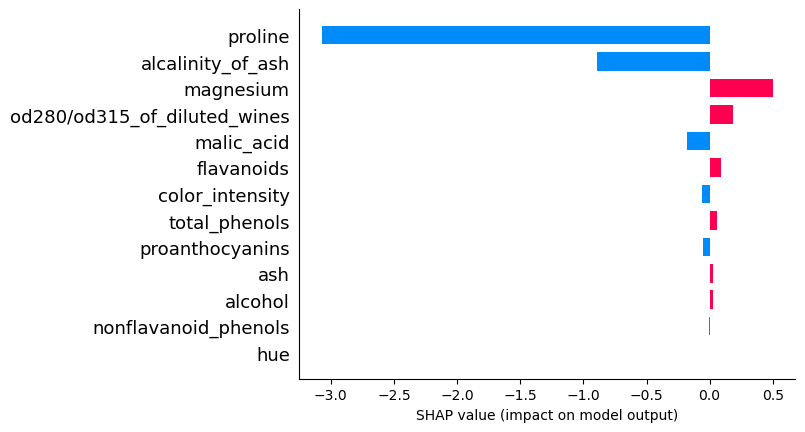

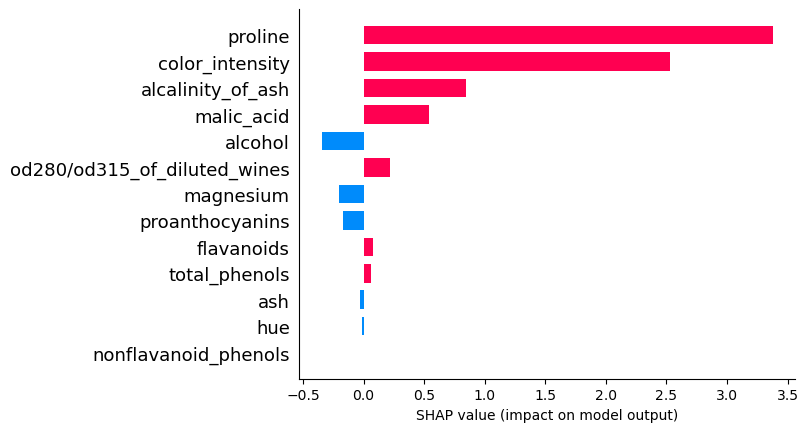

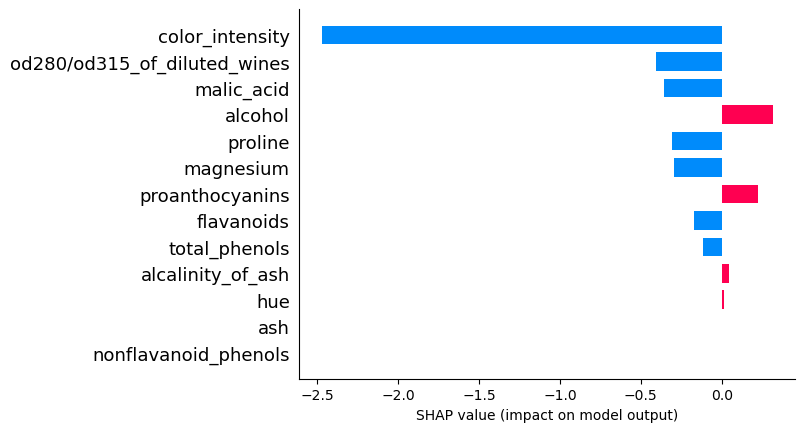

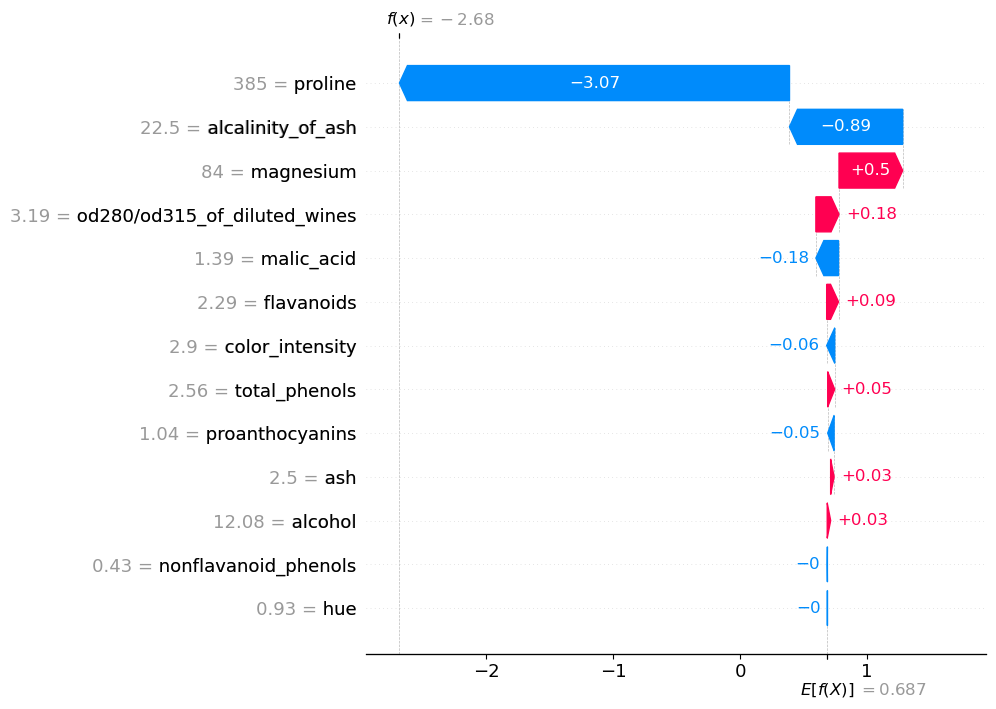

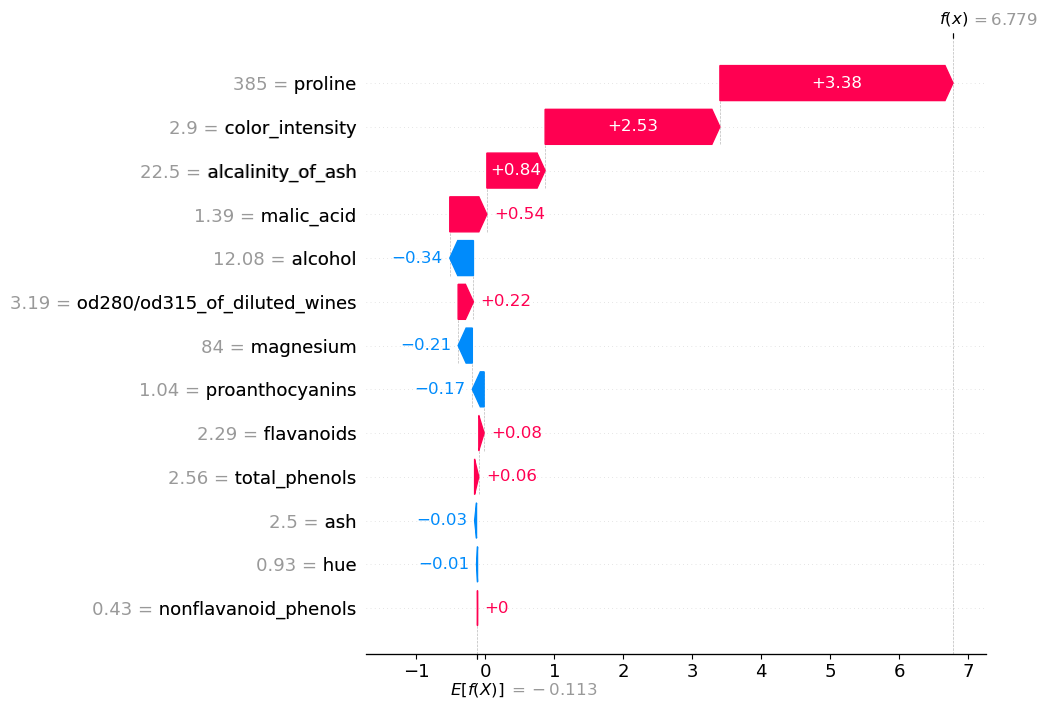

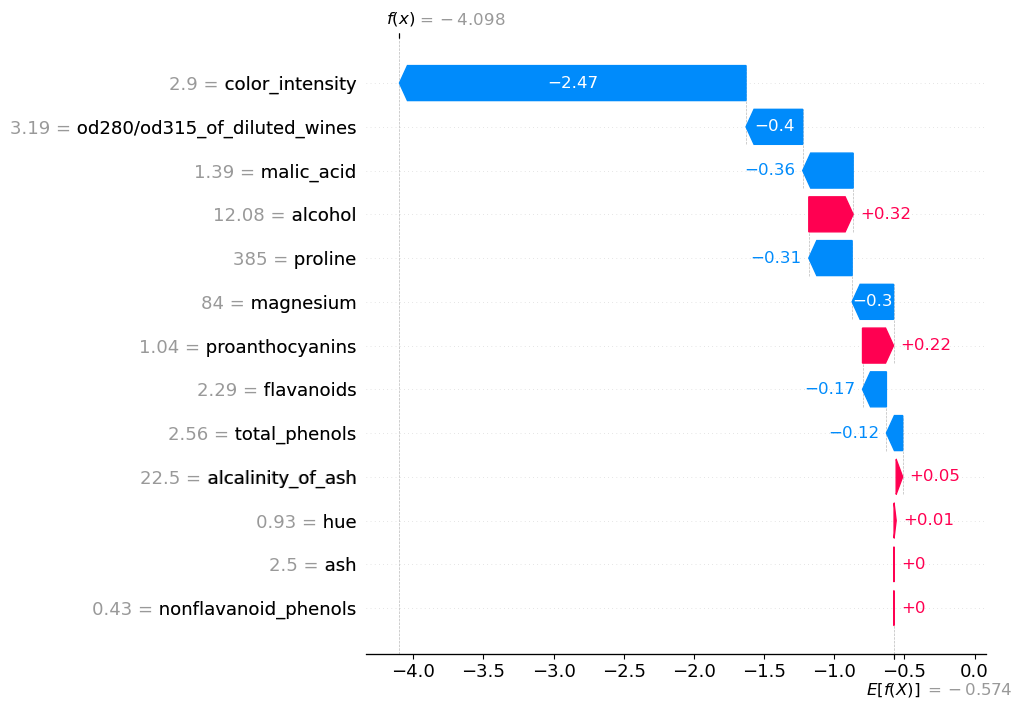

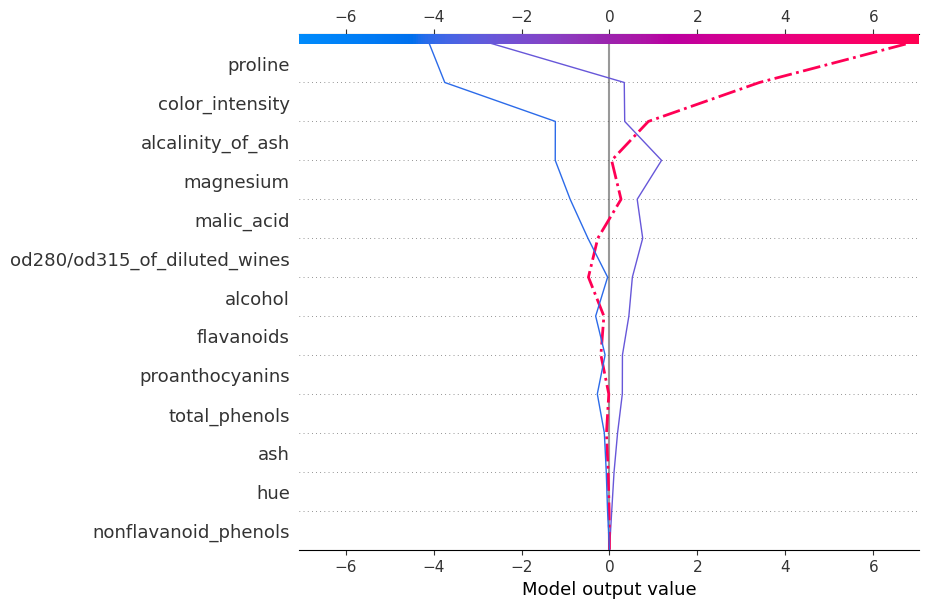

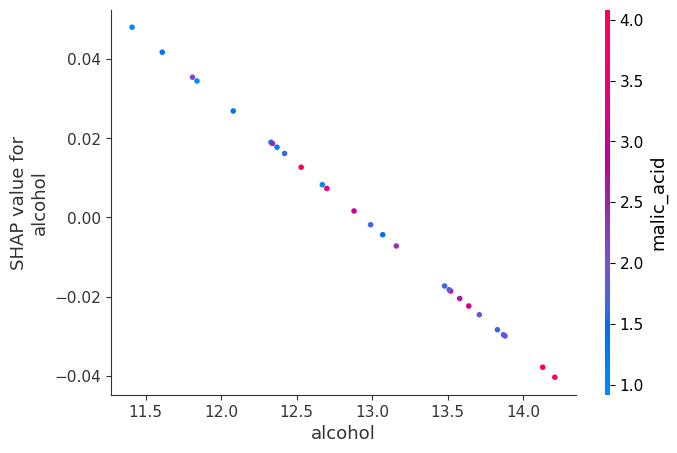

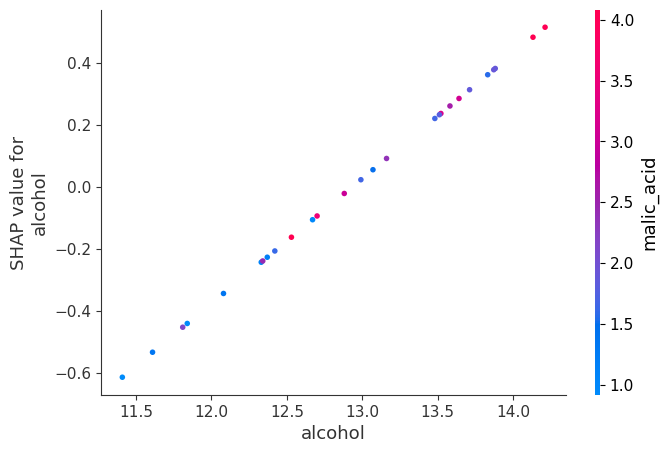

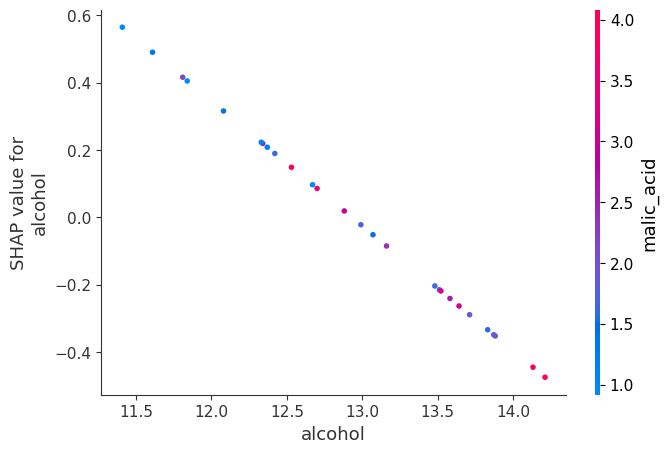

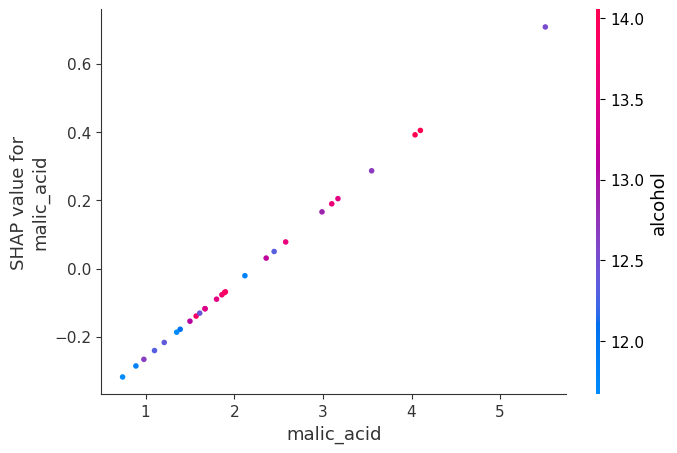

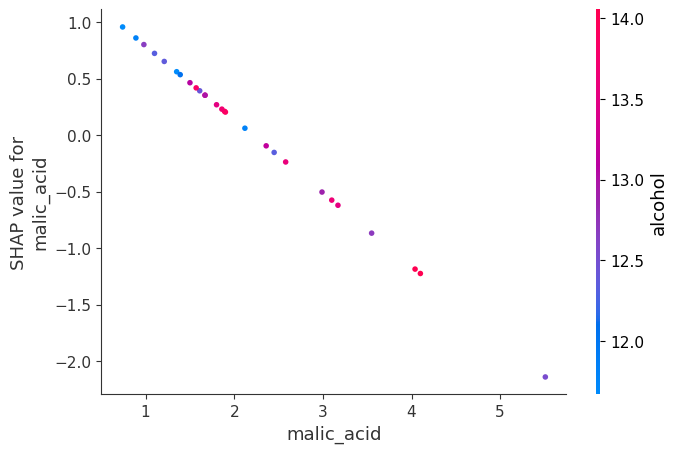

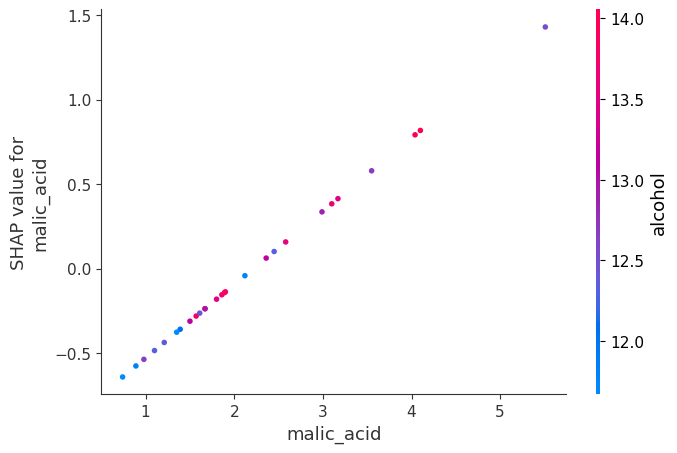

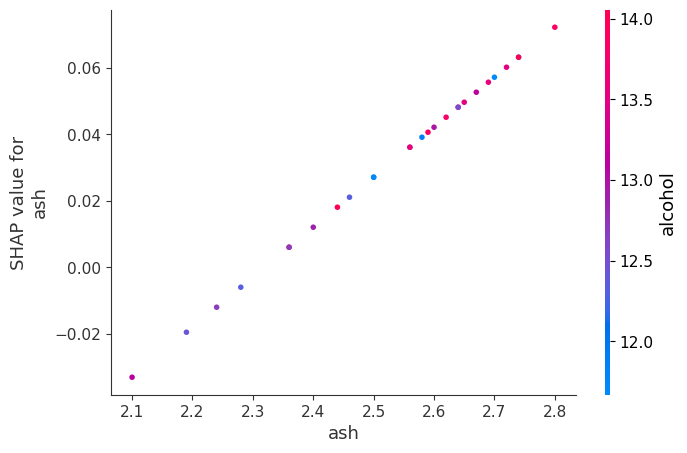

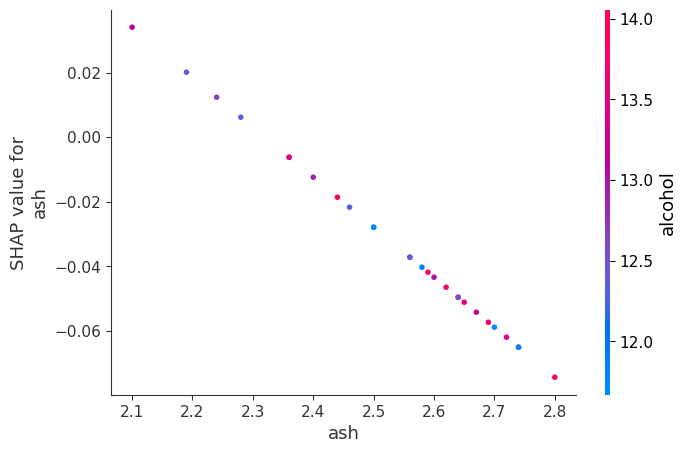

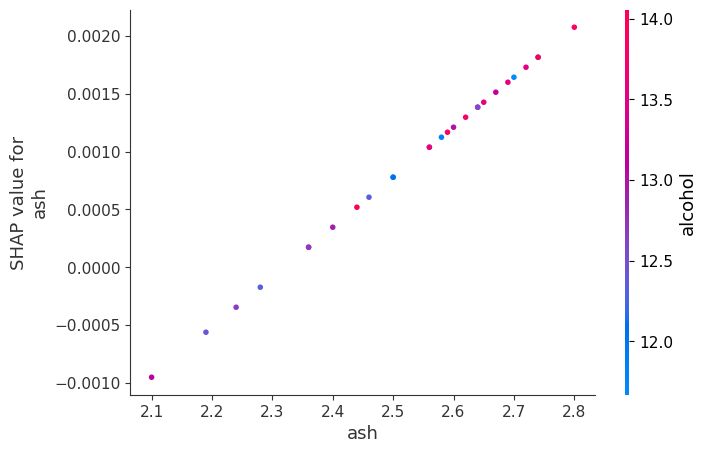

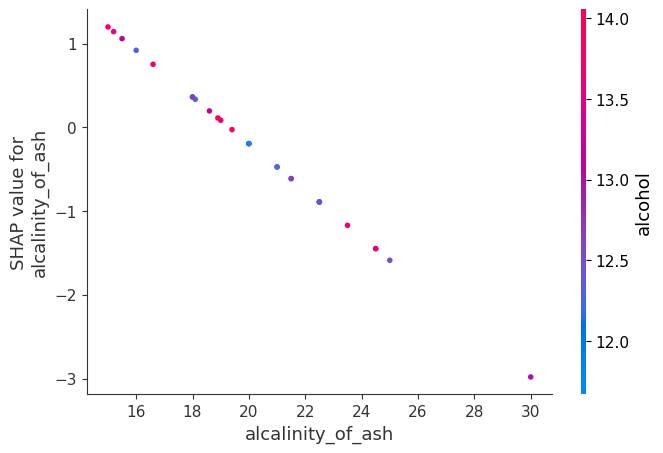

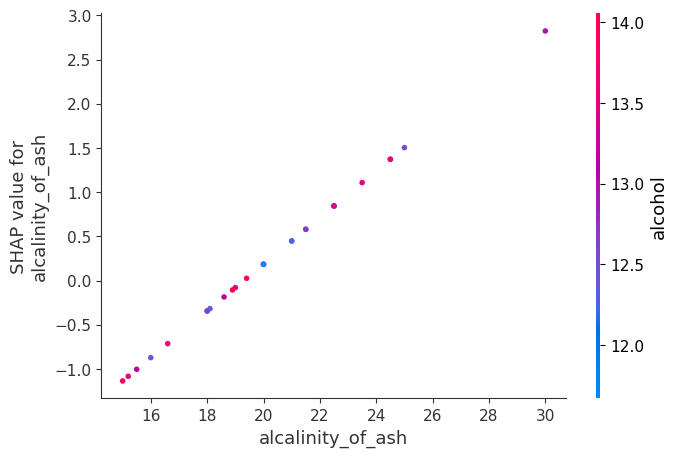

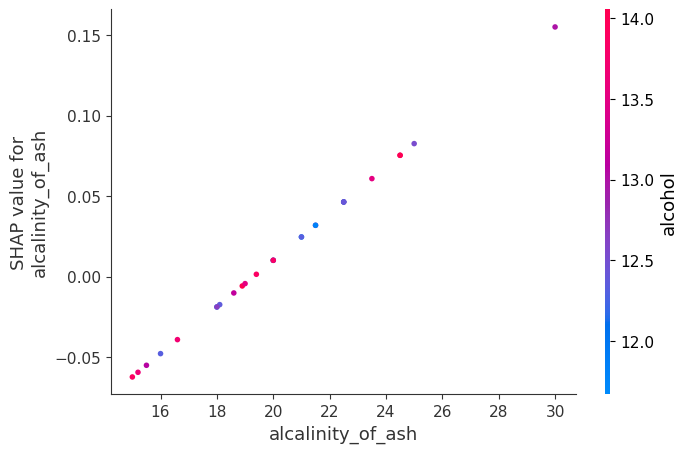

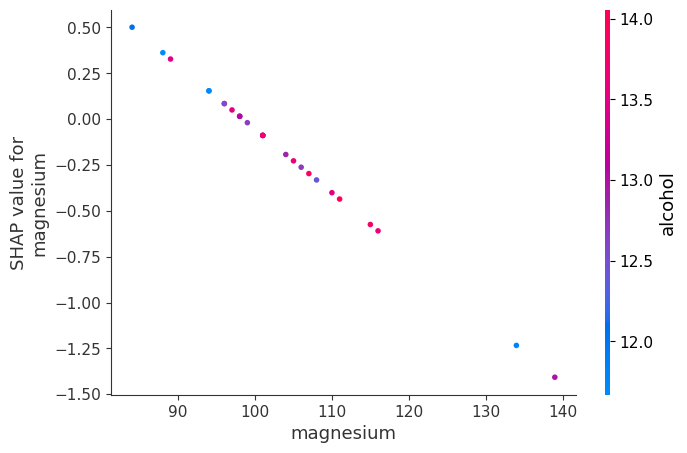

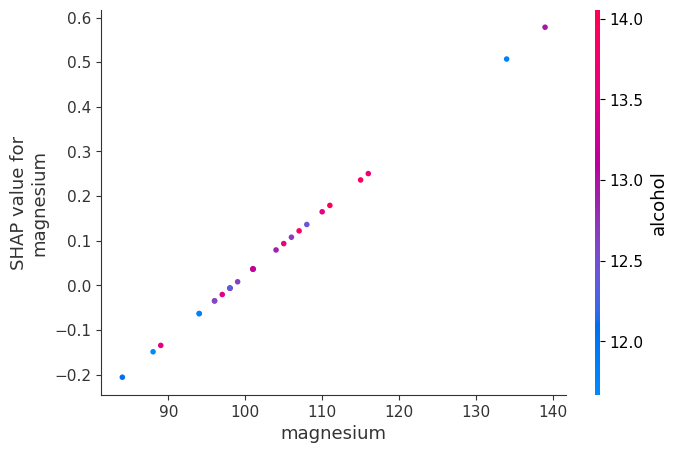

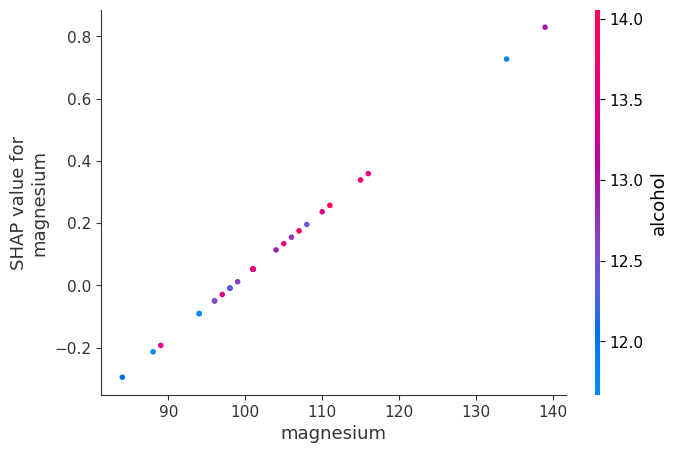

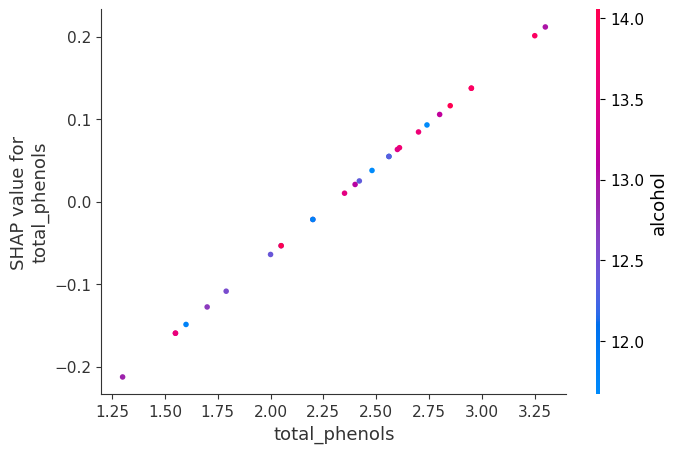

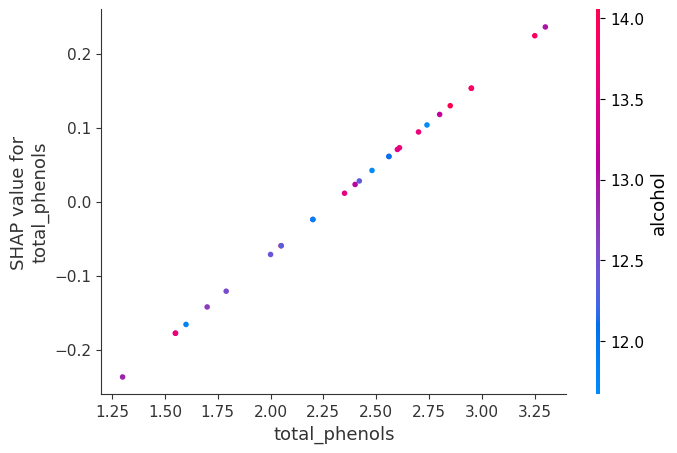

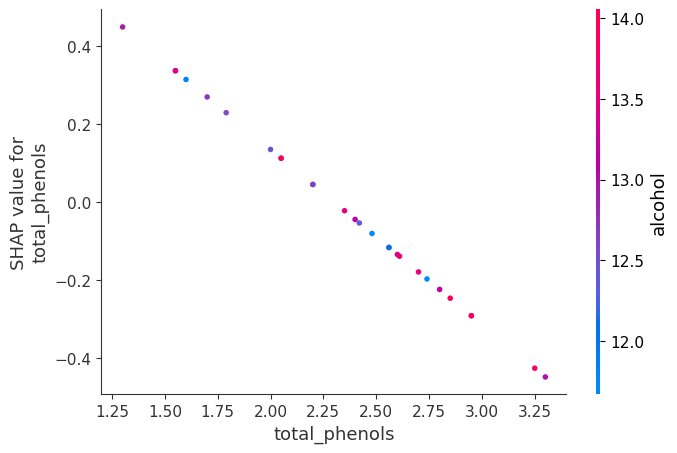

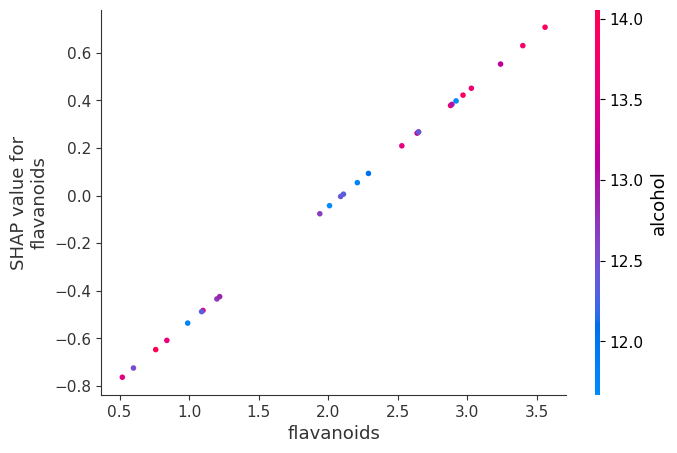

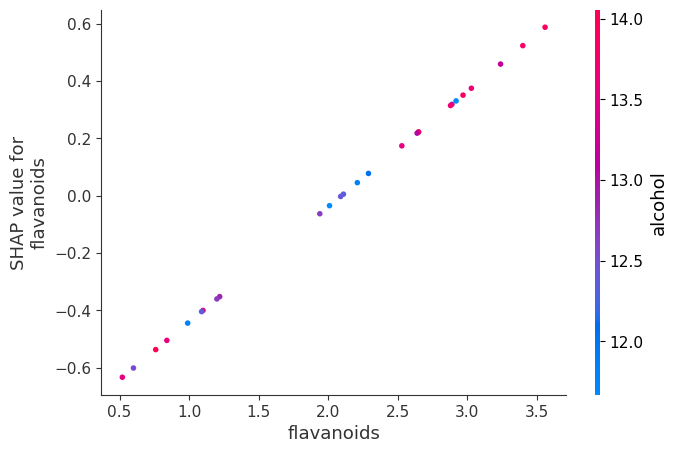

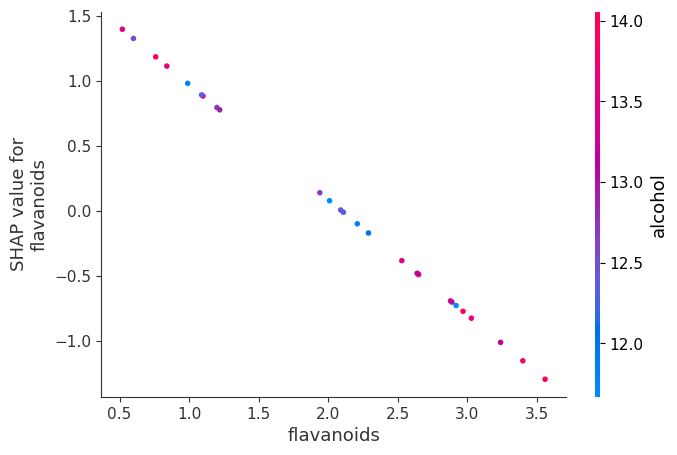

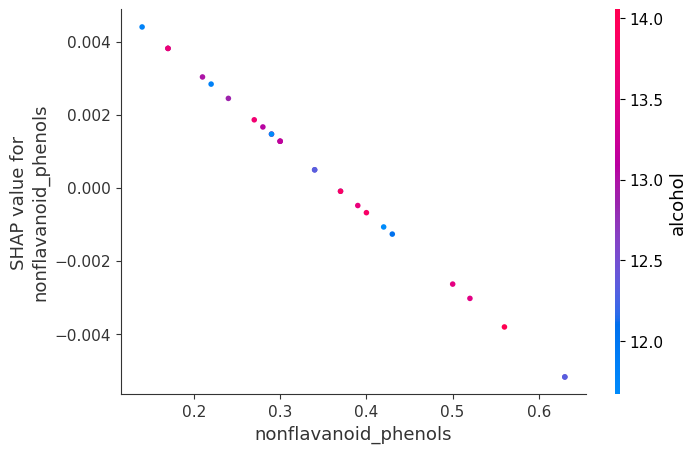

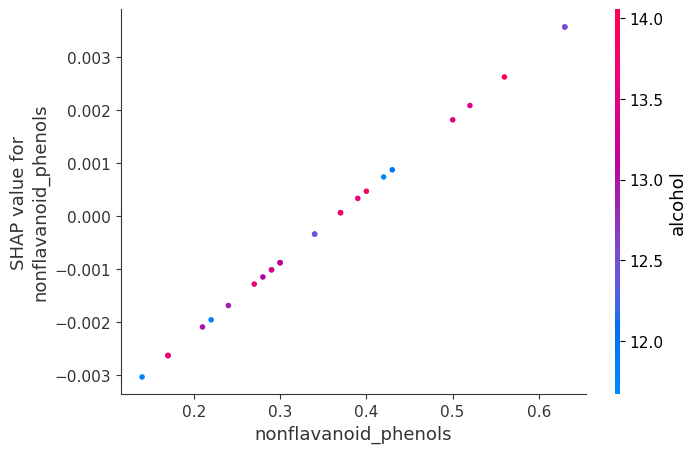

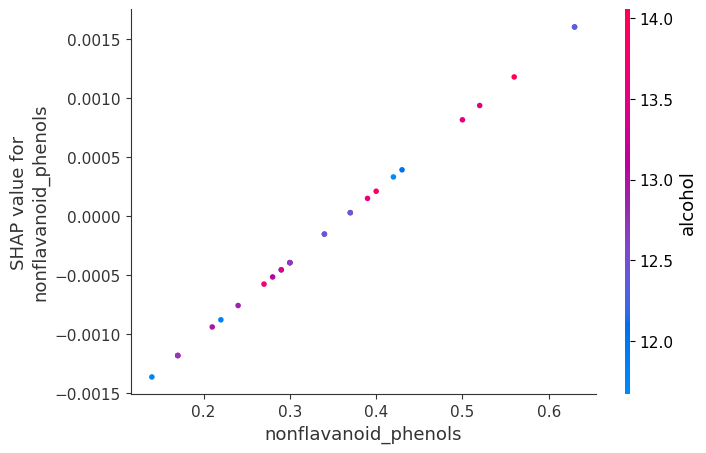

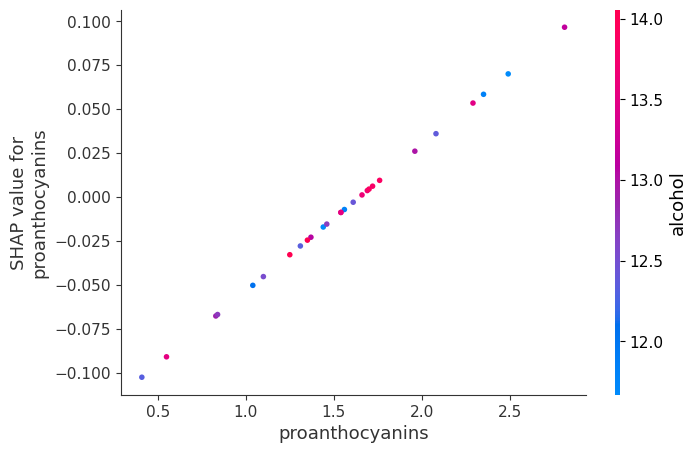

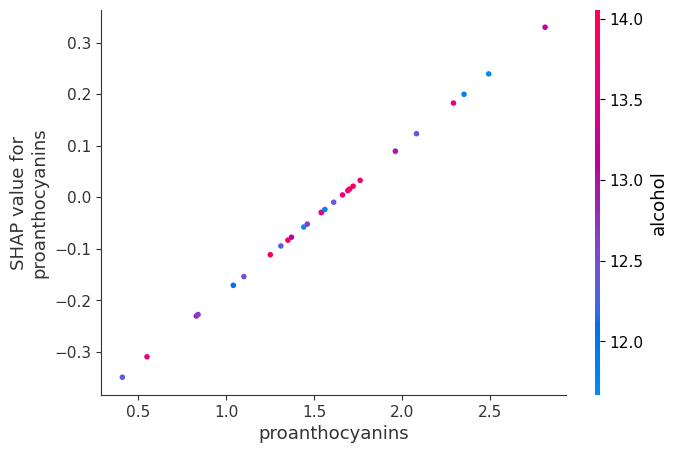

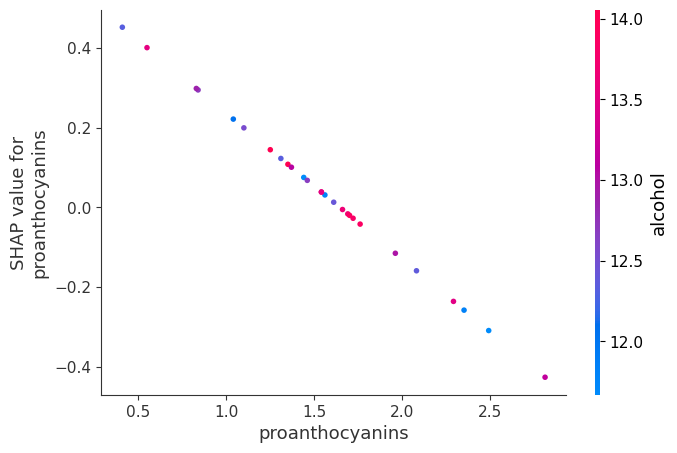

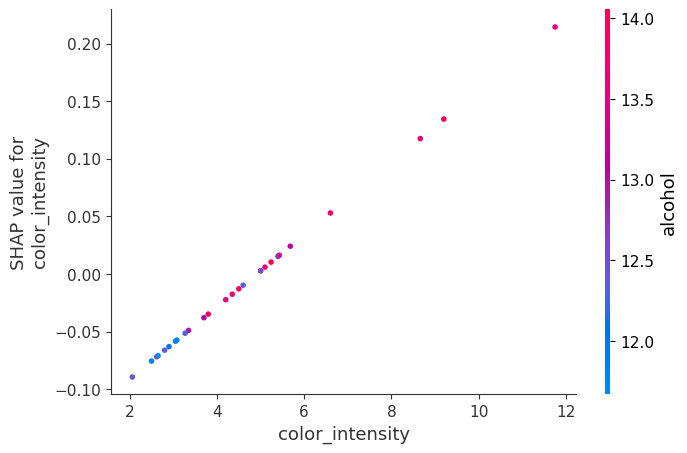

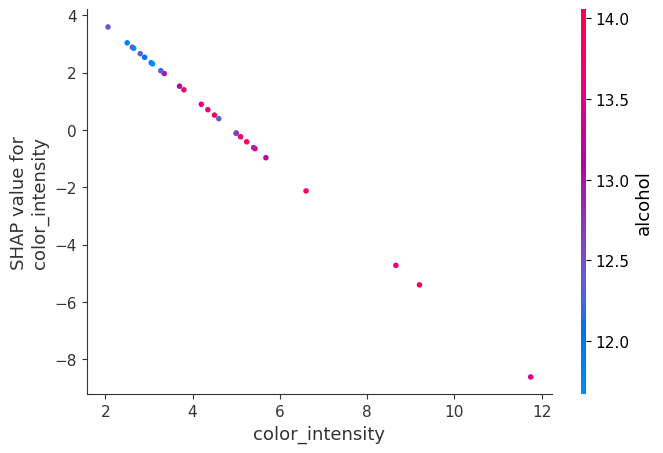

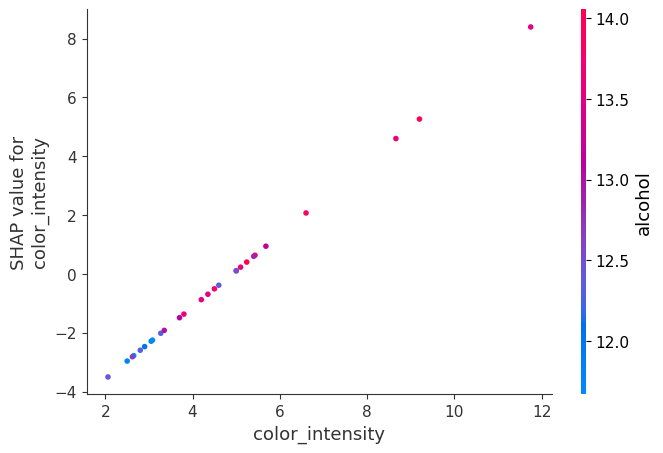

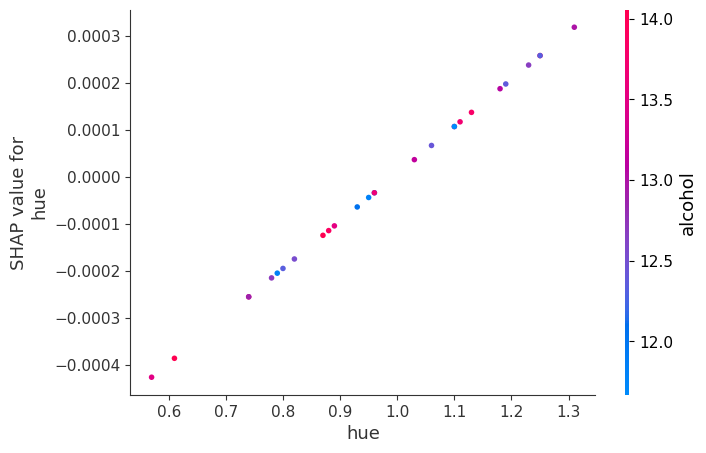

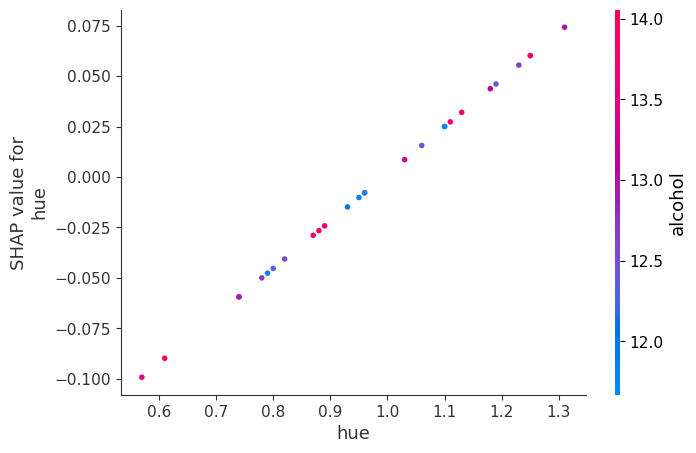

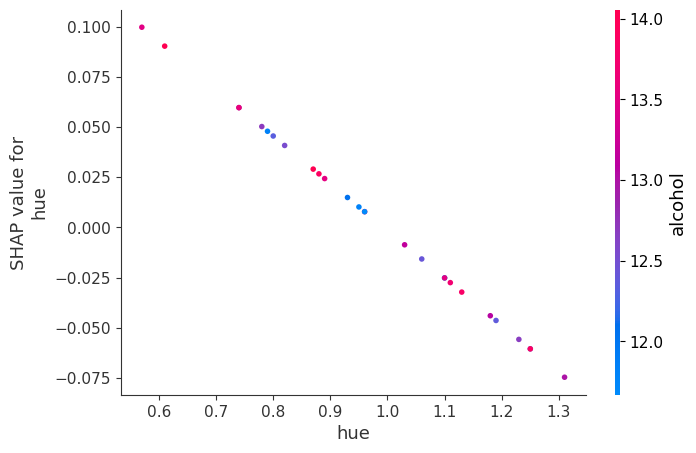

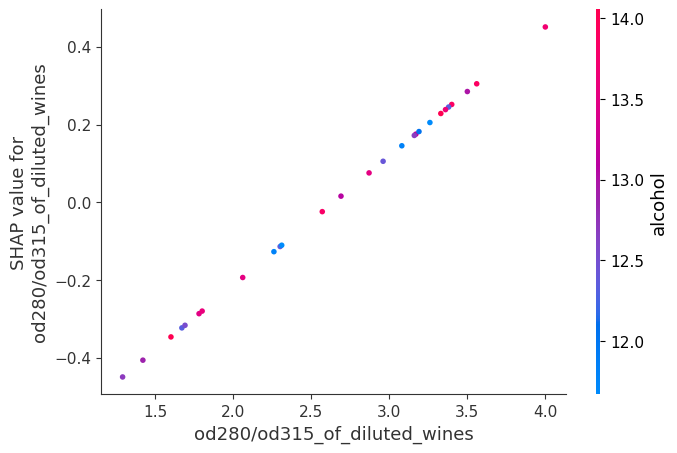

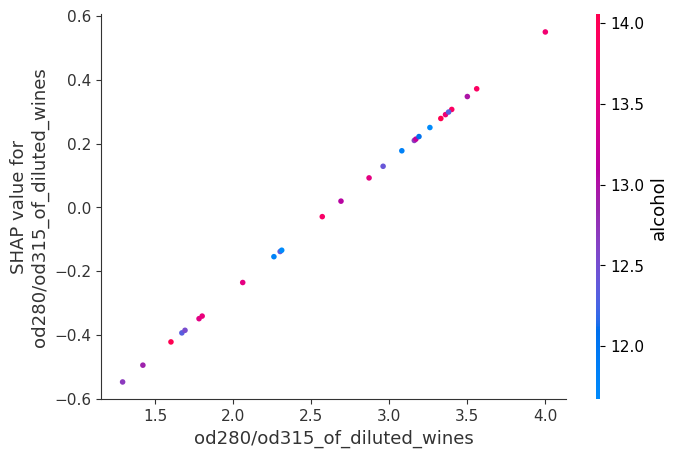

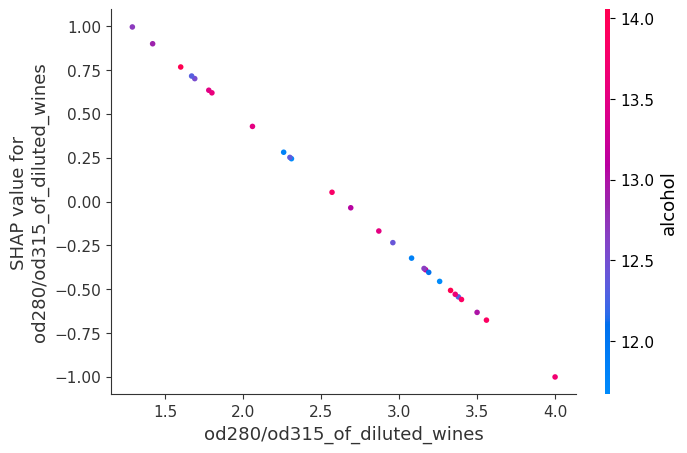

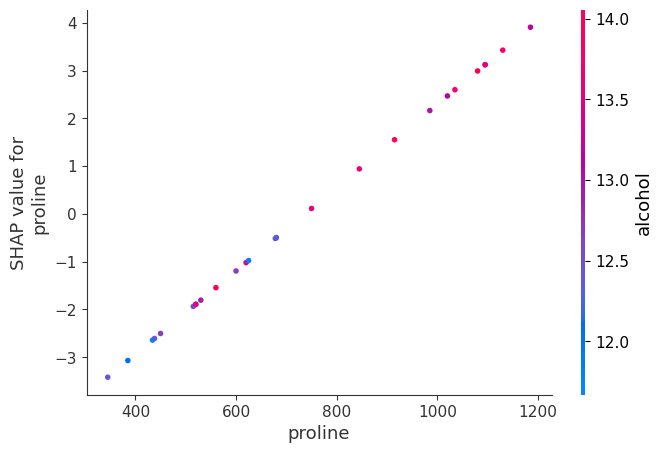

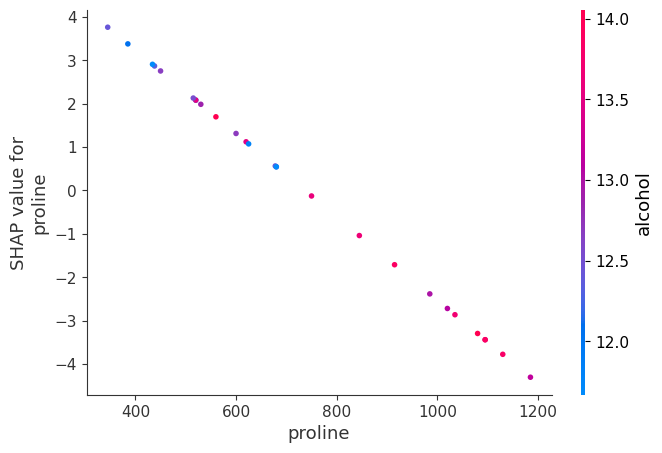

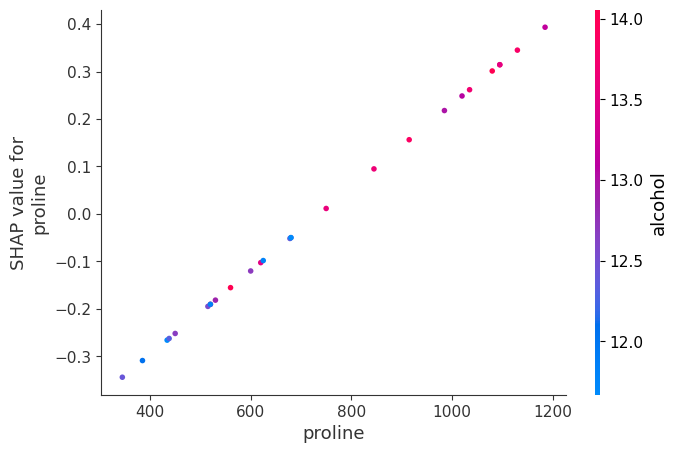

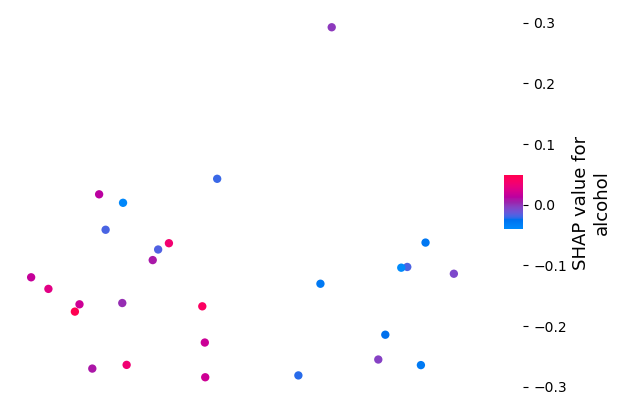

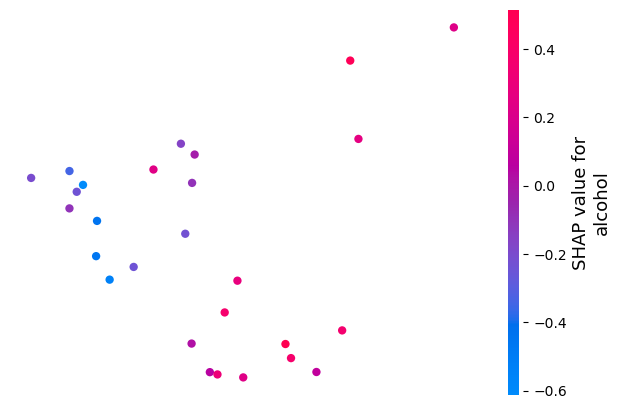

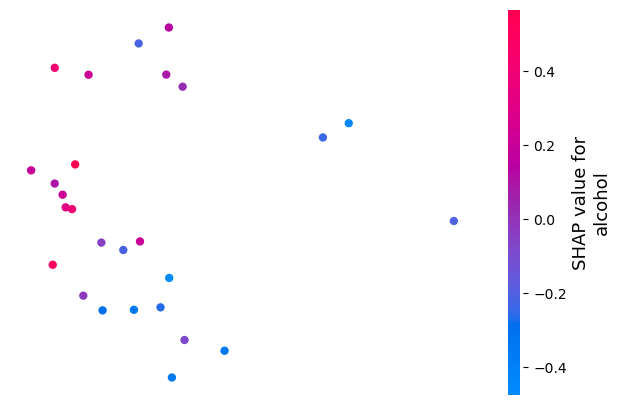

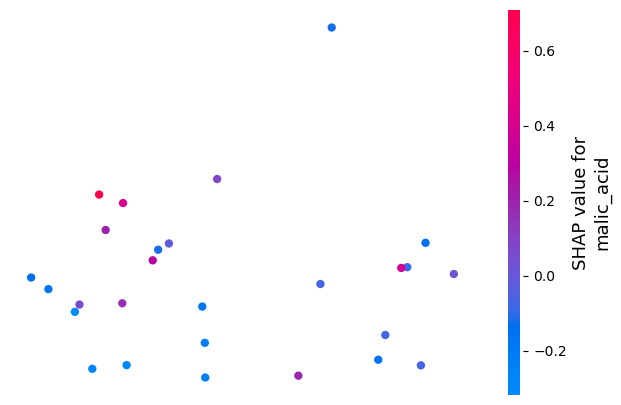

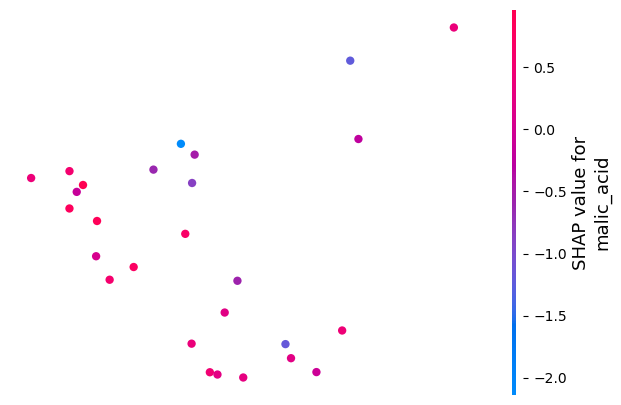

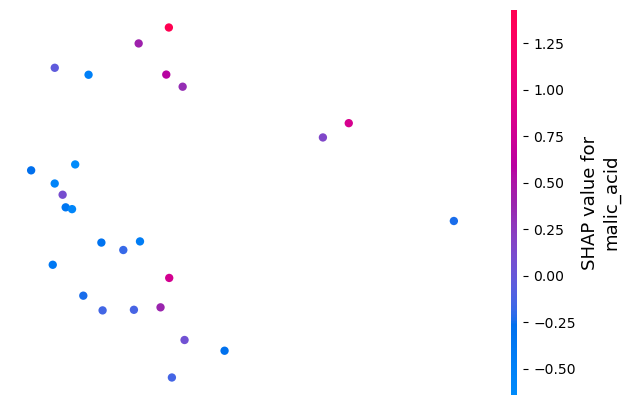

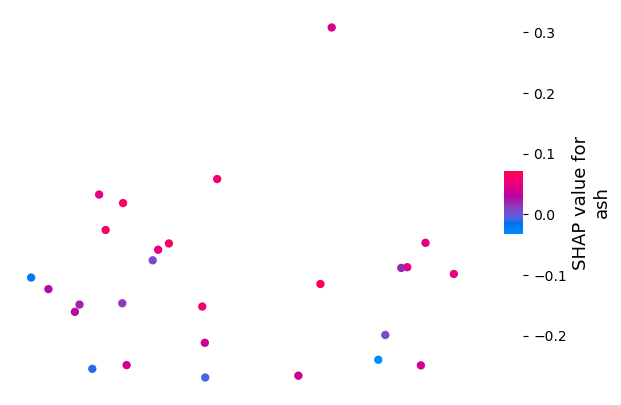

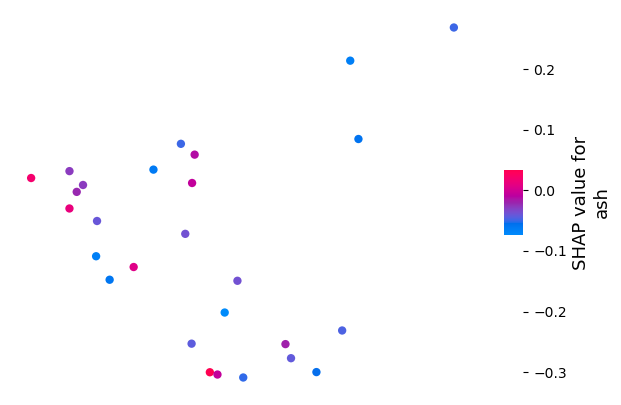

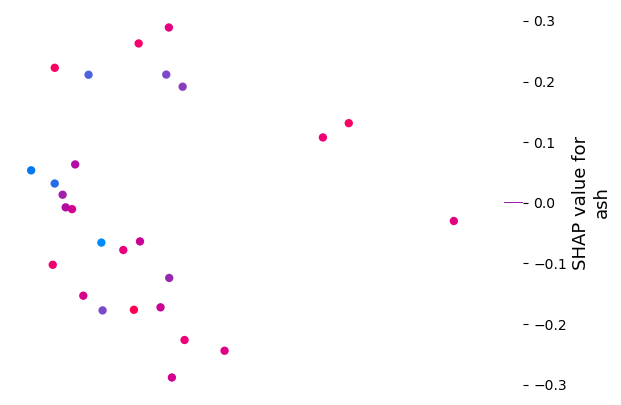

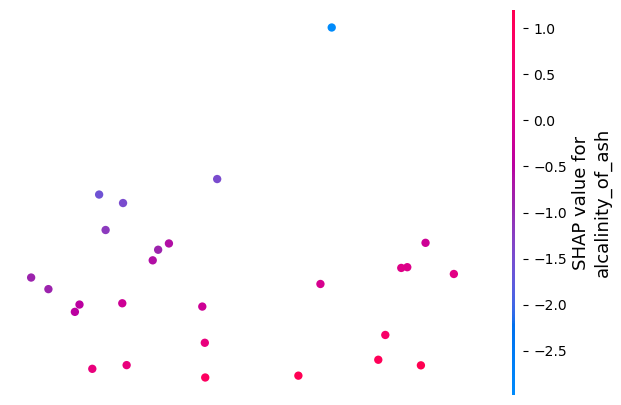

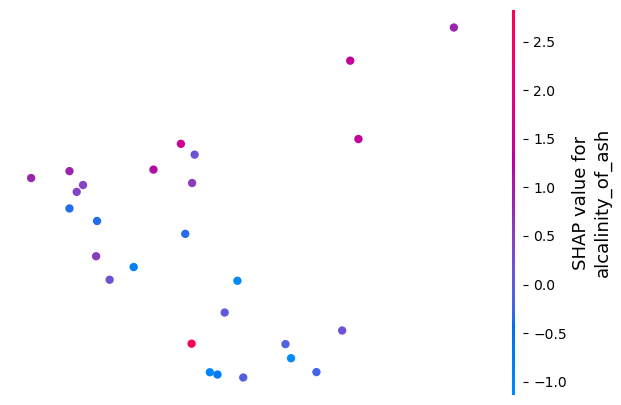

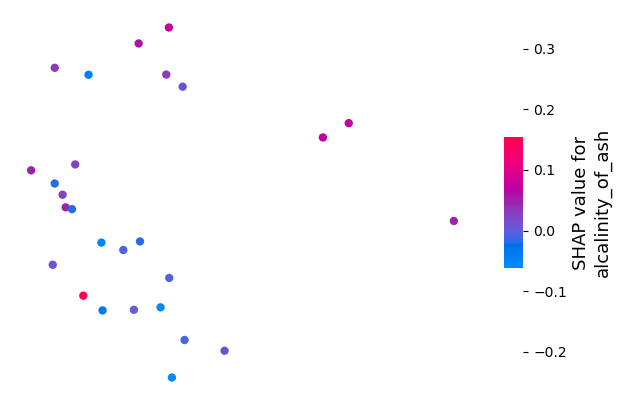

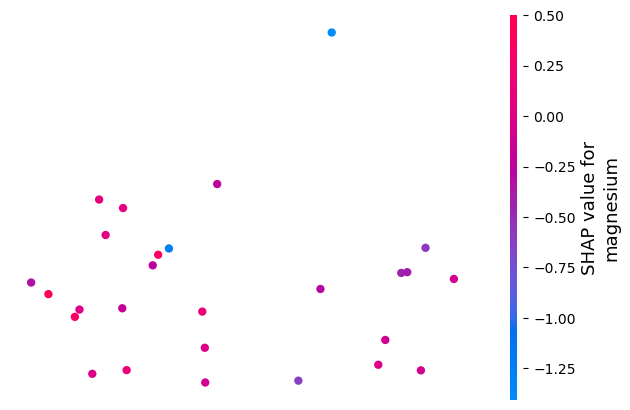

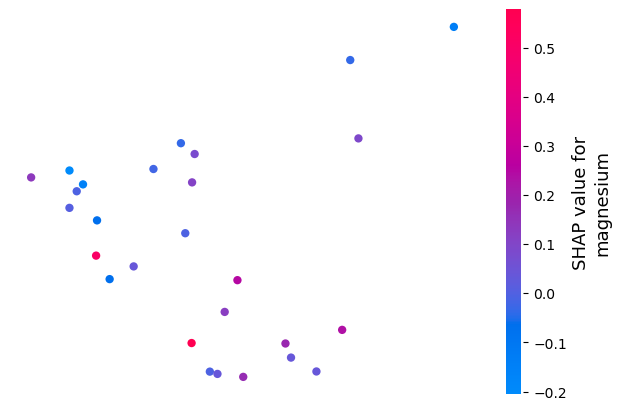

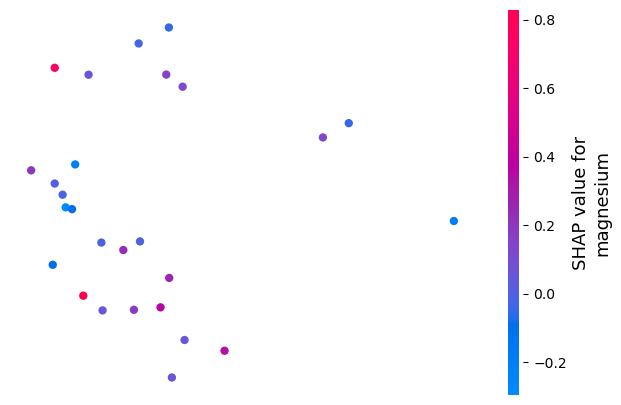

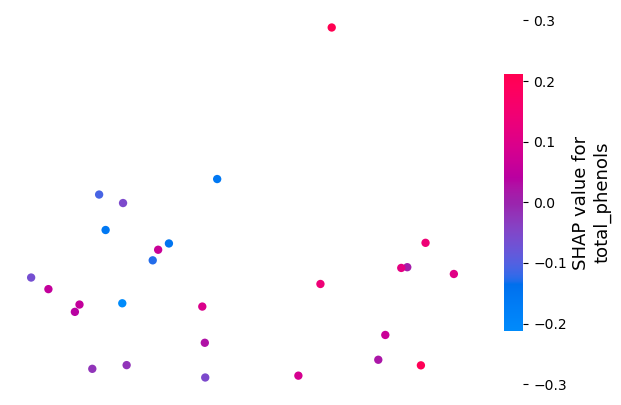

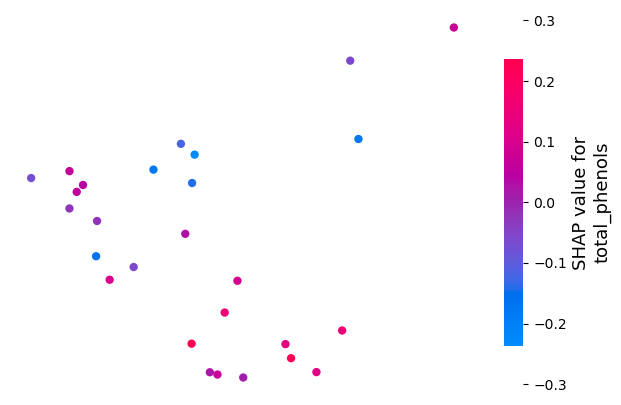

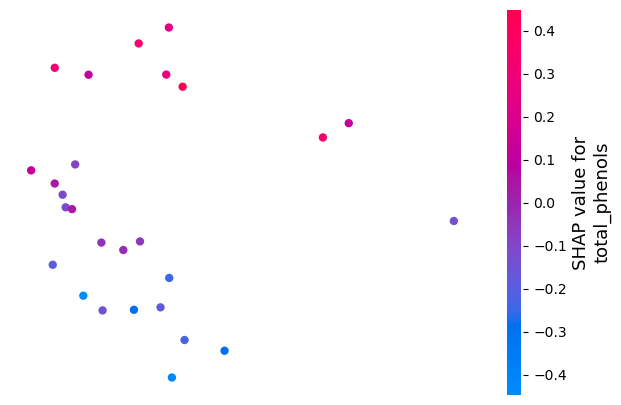

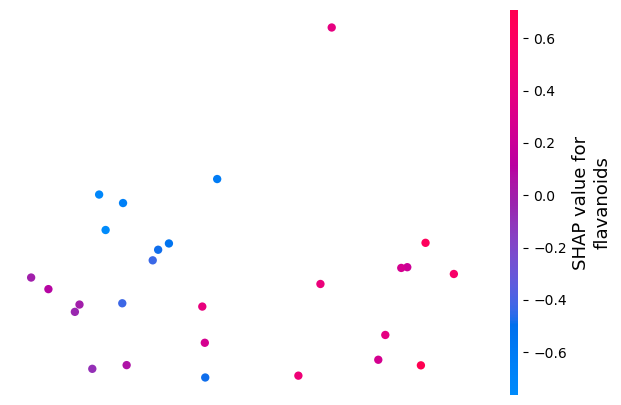

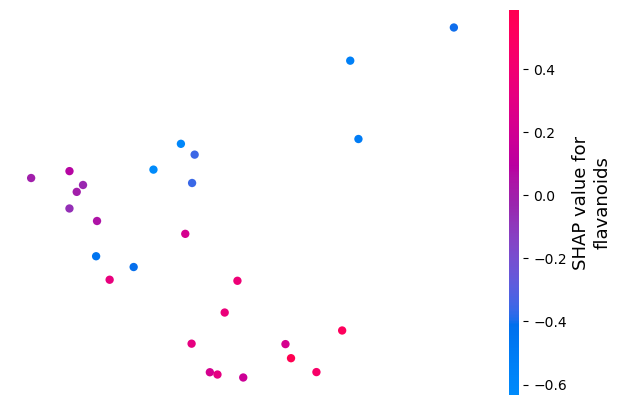

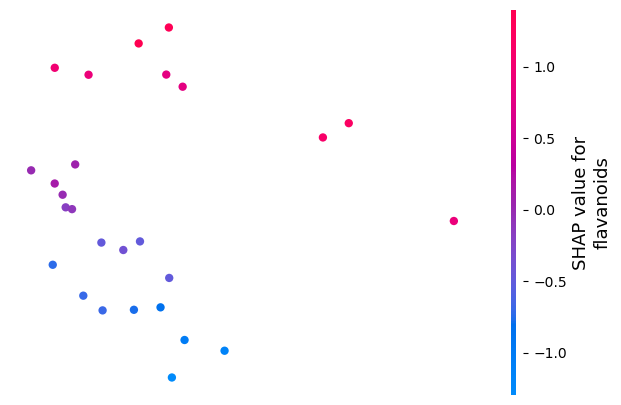

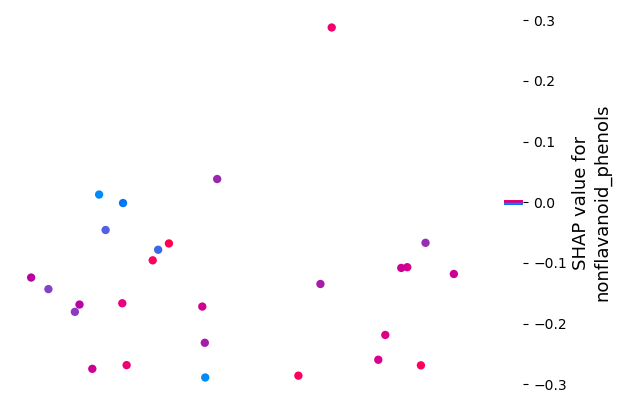

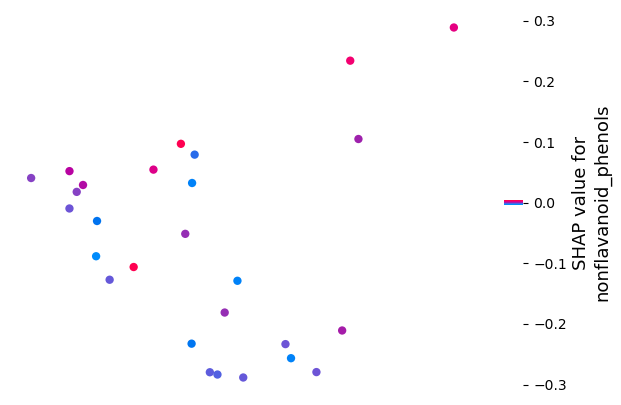

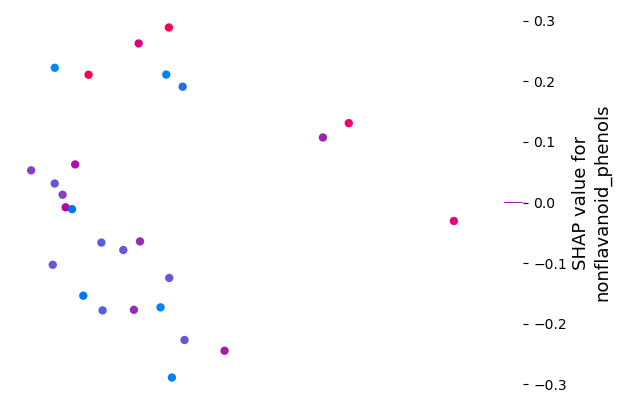

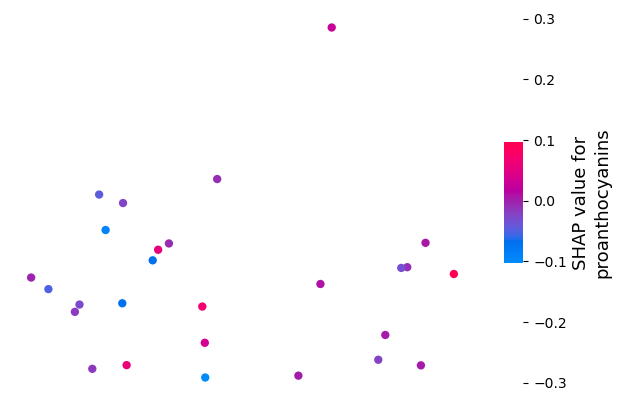

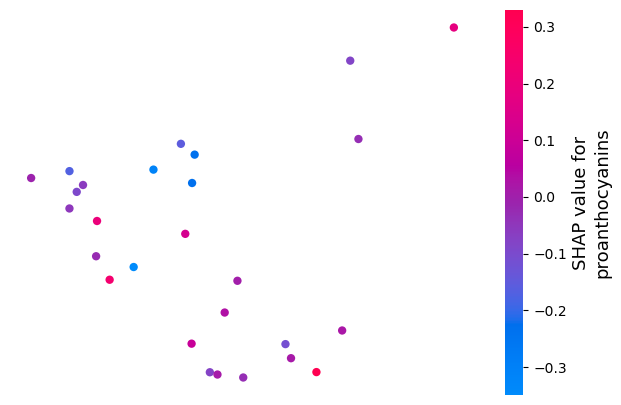

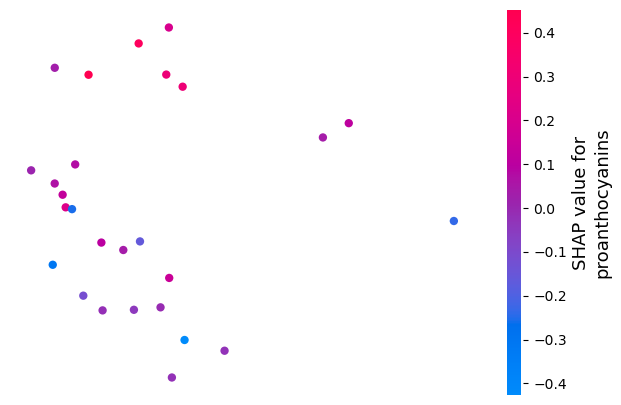

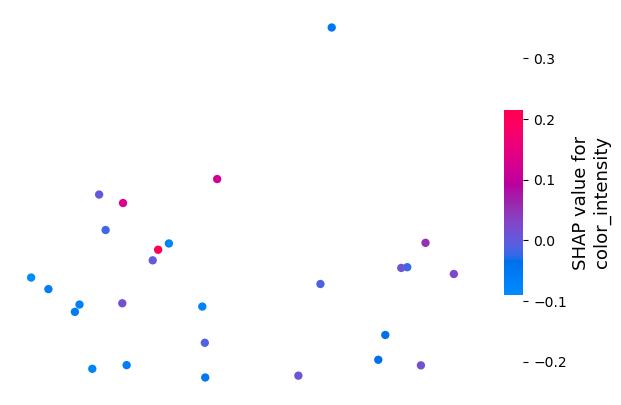

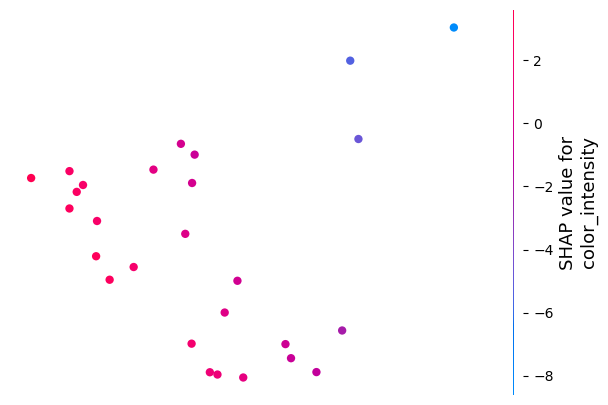

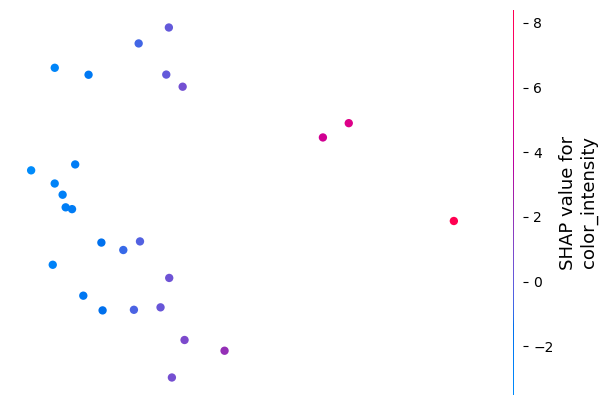

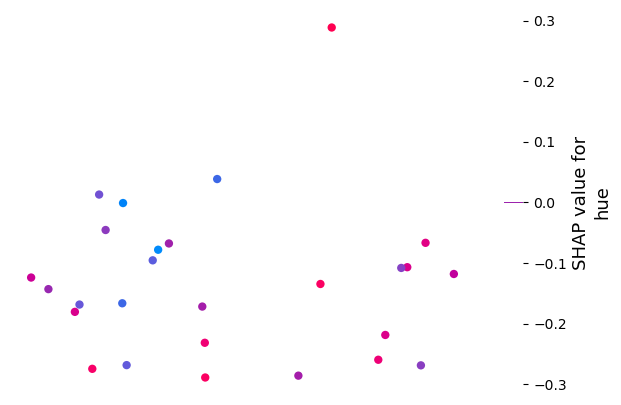

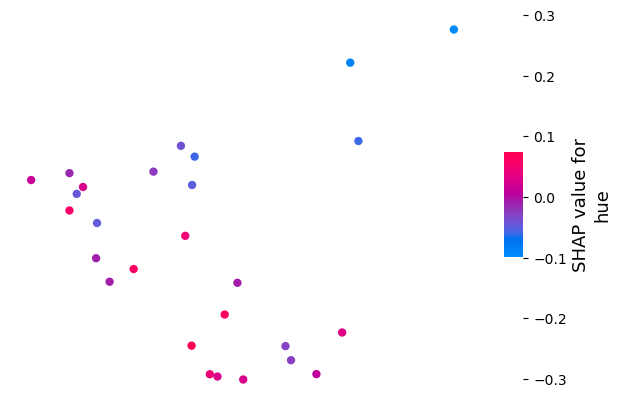

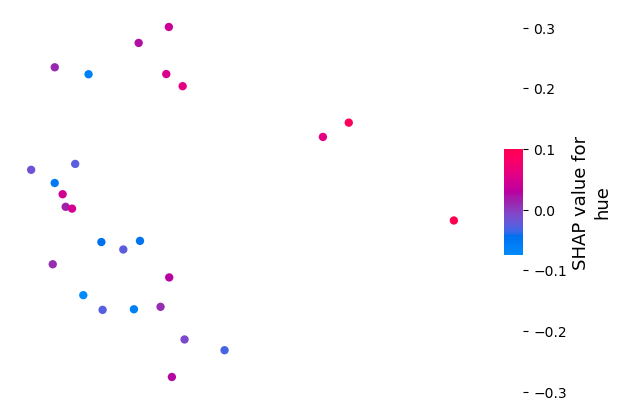

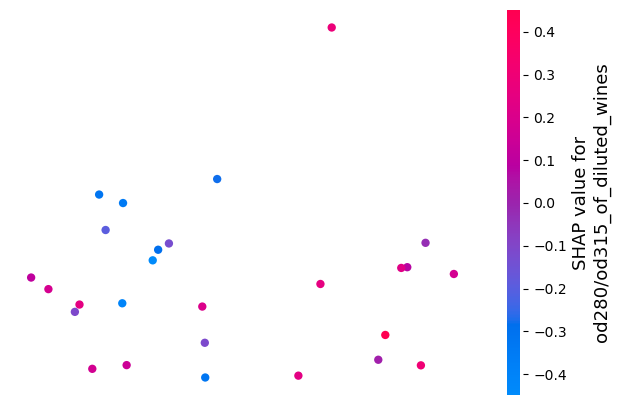

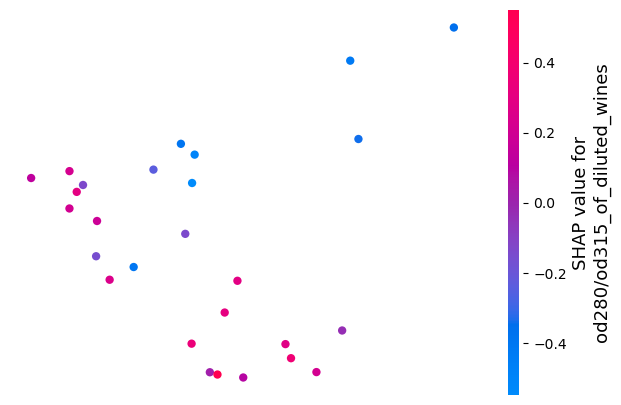

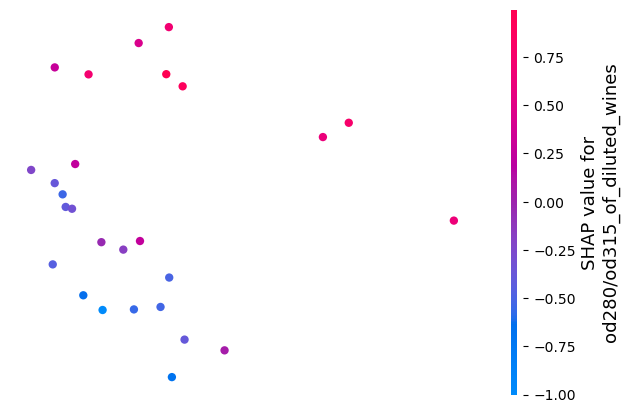

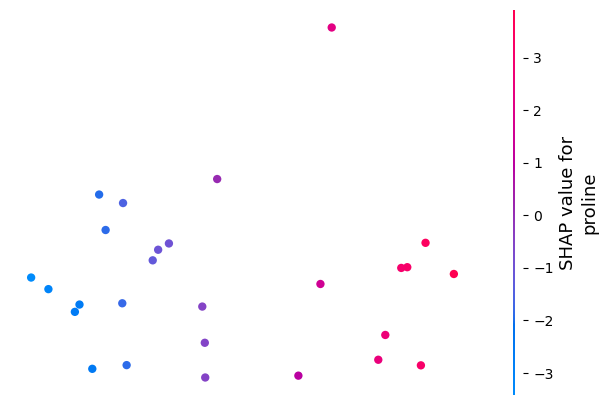

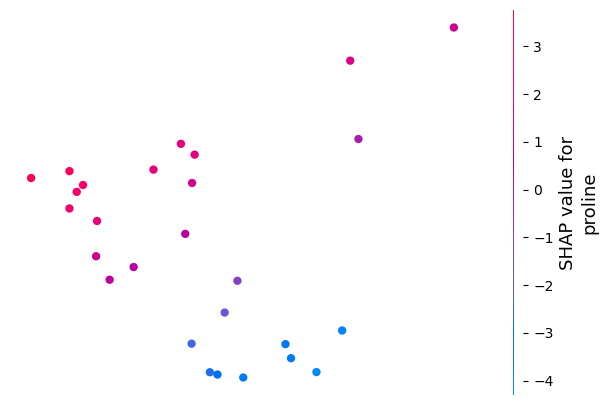

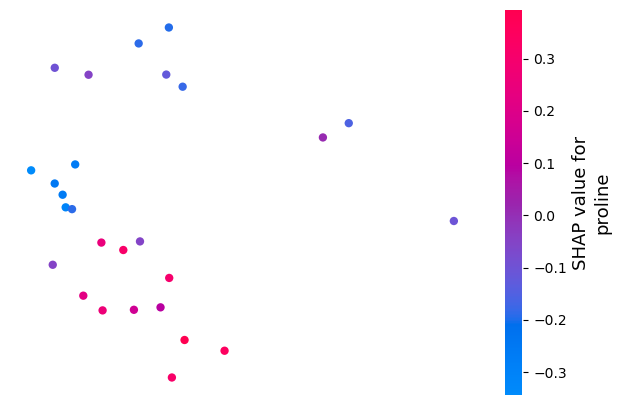

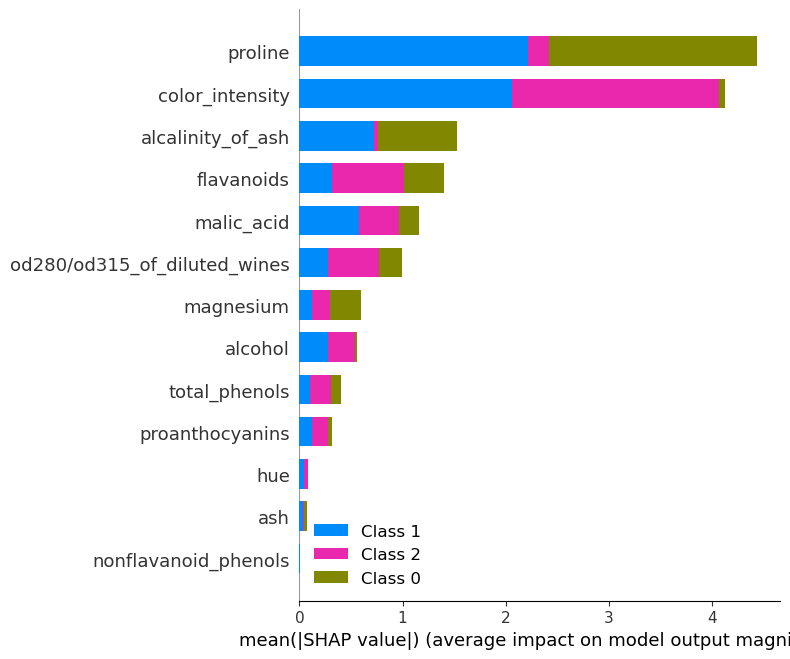

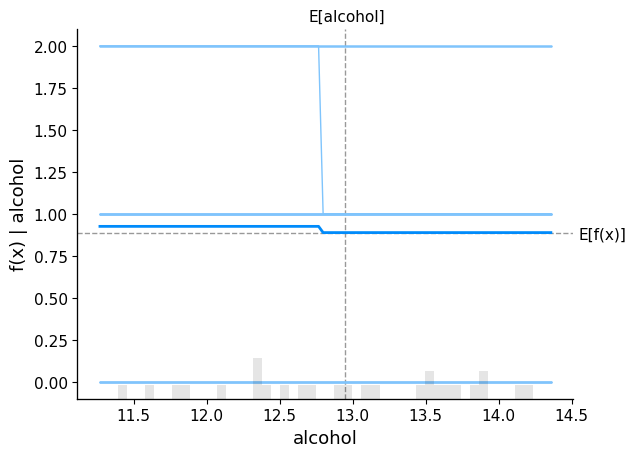

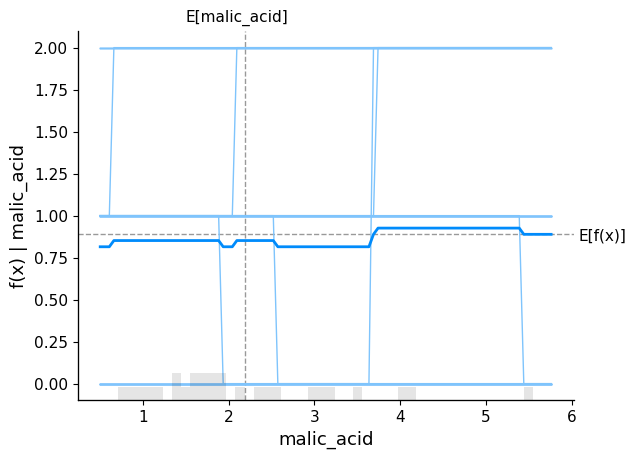

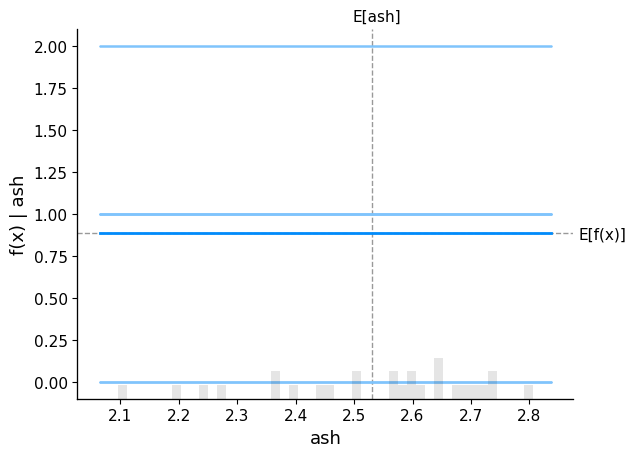

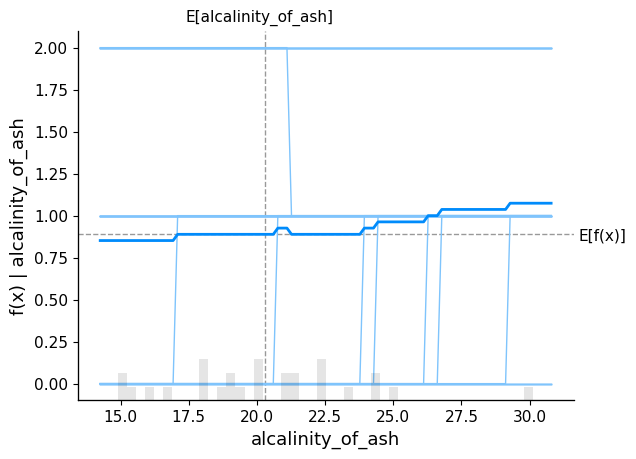

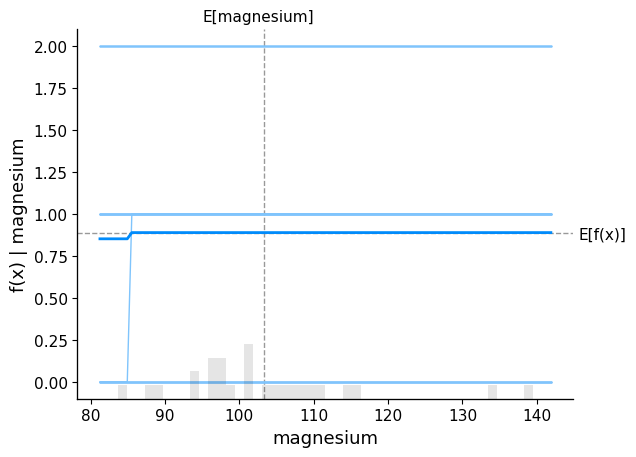

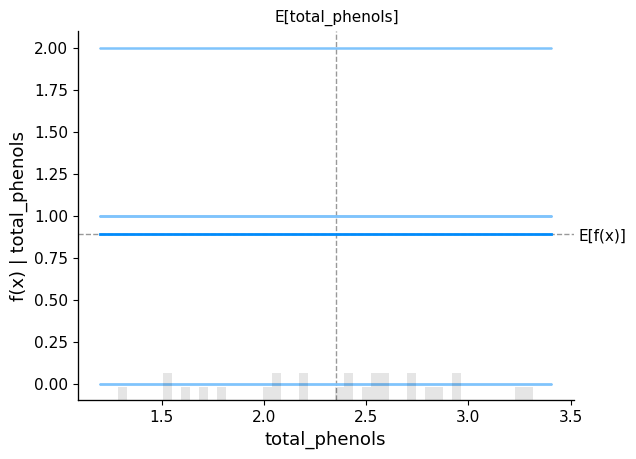

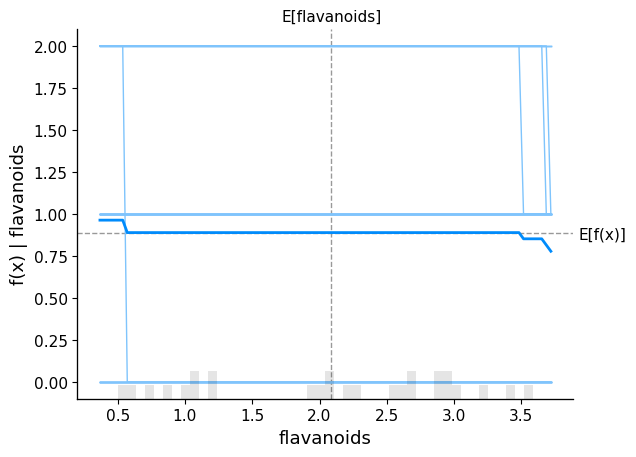

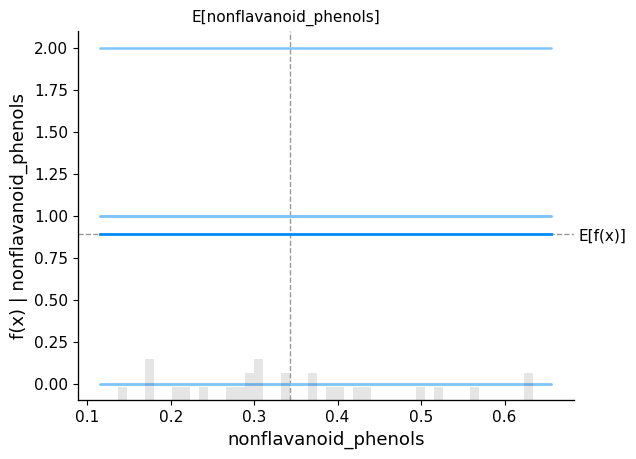

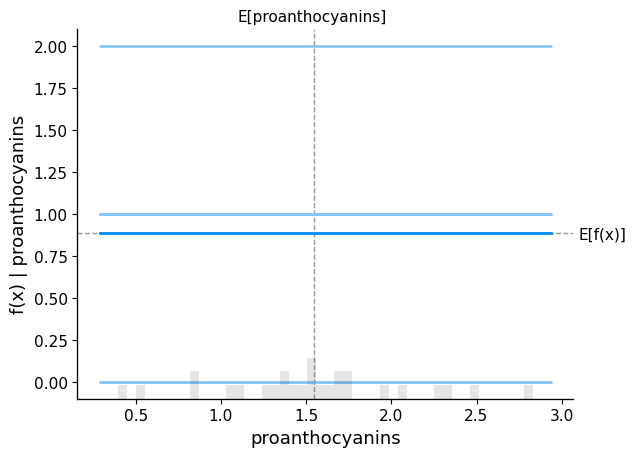

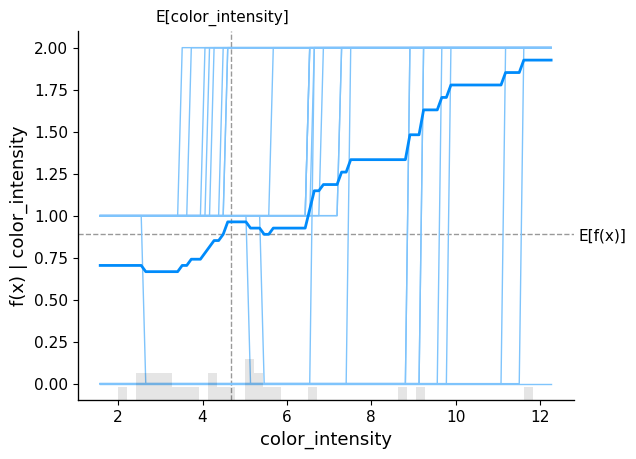

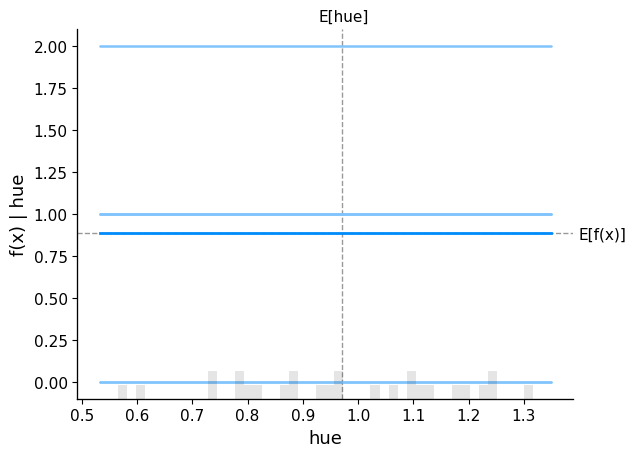

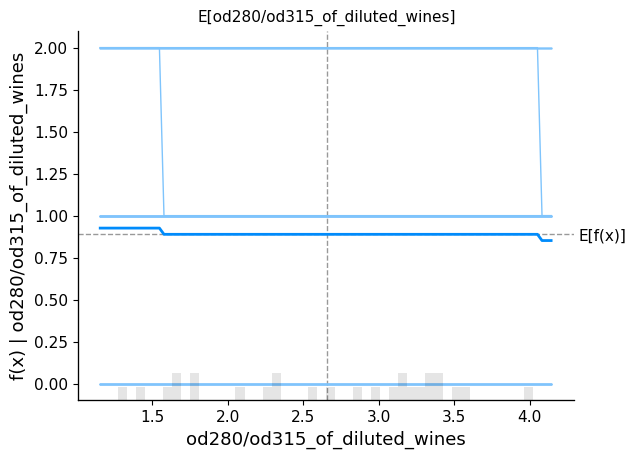

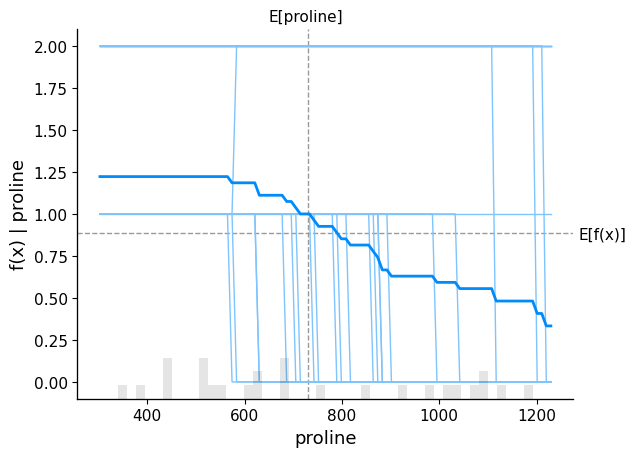

In [10]:
# Importation des bibliothèques
import shap
import sklearn
import pandas as pd
import numpy as np
import warnings

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Initialisation de SHAP
shap.initjs()

def print_wine_description(wine):
    for line in wine.DESCR.split("\n")[5:28]:
        print(line)

def load_and_preprocess_data():
    wine = load_wine()
    boston_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
    boston_df["WineType"] = wine.target

    return wine, boston_df

def train_logistic_regression(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.85, test_size=0.15, stratify=Y, random_state=123, shuffle=True)

    log_reg = LogisticRegression()
    log_reg.fit(X_train, Y_train)

    return log_reg, X_test, X_train, Y_train, Y_test

def explain_sample_with_shap(log_reg, log_reg_explainer, X_test, sample_idx):
    shap_vals = log_reg_explainer.shap_values(X_test[sample_idx])
    val1 = log_reg_explainer.expected_value[0] + shap_vals[0].sum()
    val2 = log_reg_explainer.expected_value[1] + shap_vals[1].sum()
    val3 = log_reg_explainer.expected_value[2] + shap_vals[2].sum()

    return val1, val2, val3, shap_vals

def generate_shap_bar_plots(log_reg_explainer, X_test, num_samples):
    for sample_idx in range(num_samples):
        shap.bar_plot(log_reg_explainer.shap_values(X_test[sample_idx])[0], feature_names=wine.feature_names, max_display=len(wine.feature_names))
        shap.bar_plot(log_reg_explainer.shap_values(X_test[sample_idx])[1], feature_names=wine.feature_names, max_display=len(wine.feature_names))
        shap.bar_plot(log_reg_explainer.shap_values(X_test[sample_idx])[2], feature_names=wine.feature_names, max_display=len(wine.feature_names))

def generate_waterfall_plots(log_reg_explainer, X_test):
    shap_values = log_reg_explainer(X_test[:1])
    shap_values.feature_names = wine.feature_names

    shap.waterfall_plot(shap_values[0][:, 0], max_display=len(wine.feature_names))
    shap.waterfall_plot(shap_values[0][:, 1], max_display=len(wine.feature_names))
    shap.waterfall_plot(shap_values[0][:, 2], max_display=len(wine.feature_names))

def generate_decision_plot(log_reg_explainer, X_test):
    shap.multioutput_decision_plot(log_reg_explainer.expected_value.tolist(),
                                   log_reg_explainer.shap_values(X_test),
                                   row_index=0,
                                   feature_names=wine.feature_names,
                                   highlight=[1]
                                   )

def generate_dependence_plots(log_reg_explainer, X_test):
    for feature in wine.feature_names:
        for class_idx in range(3):
            shap.dependence_plot(feature, log_reg_explainer.shap_values(X_test)[class_idx],
                                 features=X_test,
                                 feature_names=wine.feature_names
                                 )

def generate_embedding_plots(log_reg_explainer, X_test):
    for feature in wine.feature_names:
        for class_idx in range(3):
            shap.embedding_plot(feature, log_reg_explainer.shap_values(X_test)[class_idx], feature_names=wine.feature_names)

def generate_force_plots(log_reg_explainer, X_test):
    for class_idx in range(3):
        shap.force_plot(log_reg_explainer.expected_value[class_idx],
                        log_reg_explainer.shap_values(X_test[0])[class_idx],
                        feature_names=wine.feature_names,
                        out_names="Wine Type")

def generate_summary_plot(log_reg_explainer, X_test):
    shap.summary_plot(log_reg_explainer.shap_values(X_test),
                      feature_names=wine.feature_names)

def generate_partial_dependence_plots(log_reg, X_test, wine):
    for feature in wine.feature_names:
        shap.partial_dependence_plot(feature,
                                     log_reg.predict,
                                     data=X_test,
                                     feature_names=wine.feature_names,
                                     model_expected_value=True,
                                     feature_expected_value=True,
                                     ice=True
                                     )

def main():
    warnings.filterwarnings("ignore")
    
    wine, boston_df = load_and_preprocess_data()

    X, Y = wine.data, wine.target
    print("Total Data Size : ", X.shape, Y.shape)

    log_reg, X_test, X_train, Y_train, Y_test = train_logistic_regression(X, Y)
    print("Test  Accuracy : ", log_reg.score(X_test, Y_test))
    print("Train Accuracy : ", log_reg.score(X_train, Y_train))

    log_reg_explainer = shap.LinearExplainer(log_reg, X_train)

    sample_idx = 0
    val1, val2, val3, shap_vals = explain_sample_with_shap(log_reg, log_reg_explainer, X_test, sample_idx)

    print("Expected/Base Values : ", log_reg_explainer.expected_value)
    print("Shap Values for Sample %d : " % sample_idx, shap_vals)
    print("Prediction From Model                            : ", \
          wine.target_names[log_reg.predict(X_test[sample_idx].reshape(1, -1))[0]])
    print("Prediction From Adding SHAP Values to Base Value : ", wine.target_names[np.argmax([val1, val2, val3])])

    # Générer les graphiques
    generate_shap_bar_plots(log_reg_explainer, X_test, num_samples=1)
    generate_waterfall_plots(log_reg_explainer, X_test)
    generate_decision_plot(log_reg_explainer, X_test)
    generate_dependence_plots(log_reg_explainer, X_test)
    generate_embedding_plots(log_reg_explainer, X_test)
    generate_force_plots(log_reg_explainer, X_test)
    generate_summary_plot(log_reg_explainer, X_test)
    generate_partial_dependence_plots(log_reg, X_test, wine)

if __name__ == '__main__':
    main()


In [12]:
app_train = pd.read_csv('../data/application_train.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../data/application_train.csv'